In [644]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [645]:
df=pd.read_csv(r"E:\Projects\Machine Failures\Data\train.csv")

In [646]:
X_test=pd.read_csv(r"E:\Projects\Machine Failures\Data\test.csv")

In [647]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [648]:
df.shape

(136429, 14)

In [649]:
def replace_spaces_with_underscore(column_labels):
    return [label.replace(' ', '_') for label in column_labels]

df.columns=replace_spaces_with_underscore(df.columns)

X_test.columns=replace_spaces_with_underscore(X_test)

In [650]:
import re

In [651]:
def remove_special_characters(feature_names):
    # Define the regular expression pattern to match special characters
    pattern = r'[^\w\s]'
    
    # Initialize a list to store the cleaned feature names
    cleaned_feature_names = []
    
    # Iterate through each feature name and remove special characters
    for name in feature_names:
        cleaned_name = re.sub(pattern, '', name)
        cleaned_feature_names.append(cleaned_name)
    
    return cleaned_feature_names

df.columns=remove_special_characters(df.columns)
X_test.columns=remove_special_characters(X_test.columns)

In [652]:
df.columns

Index(['id', 'Product_ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [653]:
df.isna().sum()

id                       0
Product_ID               0
Type                     0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

In [654]:
df.dtypes

id                         int64
Product_ID                object
Type                      object
Air_temperature_K        float64
Process_temperature_K    float64
Rotational_speed_rpm       int64
Torque_Nm                float64
Tool_wear_min              int64
Machine_failure            int64
TWF                        int64
HDF                        int64
PWF                        int64
OSF                        int64
RNF                        int64
dtype: object

In [655]:
df.drop(columns='id',axis=1,inplace=True)

In [656]:
target_col = 'Machine_failure'

num_cols = [
    'Air_temperature_K',
    'Process_temperature_K',
    'Rotational_speed_rpm',
    'Torque_Nm',
    'Tool_wear_min'
]
binary_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]

cat_cols=['Product_ID', 'Type']

## Numerical Columns

In [657]:
num_cols

['Air_temperature_K',
 'Process_temperature_K',
 'Rotational_speed_rpm',
 'Torque_Nm',
 'Tool_wear_min']

Fucntions

In [658]:

def plot_histogram_column(column_name,dataframe=df):
    """
    Function to plot a histogram for a specific column in the given DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column for which the histogram will be plotted.

    Returns:
    None
    """
    # Check if the column_name exists in the DataFrame
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Create the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(dataframe[column_name], bins=20, color='skyblue', edgecolor='black')
    
    # Customize the plot
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name.capitalize()}')
    
    # Show the plot
    plt.show()

In [659]:
def plot_histograms(column_names, dataframe=df):
    """
    Function to plot histograms for specific columns in the given DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.
    column_names (list): List of column names for which the histograms will be plotted.

    Returns:
    None
    """
    num_plots = len(column_names)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed
    num_cols = min(num_plots, 3)     # Maximum 3 columns per row

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axs = axs.ravel()  # Flatten the 2D array of subplots

    for i, column_name in enumerate(column_names):
        # Check if the column_name exists in the DataFrame
        if column_name not in dataframe.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue

        # Create the histogram
        axs[i].hist(dataframe[column_name], bins=20, color='skyblue', edgecolor='black')
        axs[i].set_xlabel(column_name.capitalize())
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Histogram of {column_name.capitalize()}')

    # Hide any remaining empty subplots
    for j in range(num_plots, num_rows * num_cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

In [660]:
def plot_boxplots(column_names,dataframe=df ):
    """
    Function to plot box plots for specific columns in the given DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.
    column_names (list): List of column names for which the box plots will be plotted.

    Returns:
    None
    """
    # Create a figure and axes for the subplots
    num_plots = len(column_names)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed
    num_cols = min(num_plots, 3)     # Maximum 3 columns per row

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axs = axs.ravel()  # Flatten the 2D array of subplots

    for i, column_name in enumerate(column_names):
        # Check if the column_name exists in the DataFrame
        if column_name not in dataframe.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue

        # Create the box plot
        axs[i].boxplot(dataframe[column_name])
        axs[i].set_xlabel(column_name.capitalize())
        axs[i].set_ylabel('Value')
        axs[i].set_title(f'Box Plot of {column_name.capitalize()}')

    # Hide any remaining empty subplots
    for j in range(num_plots, num_rows * num_cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

In [661]:
num_cols

['Air_temperature_K',
 'Process_temperature_K',
 'Rotational_speed_rpm',
 'Torque_Nm',
 'Tool_wear_min']

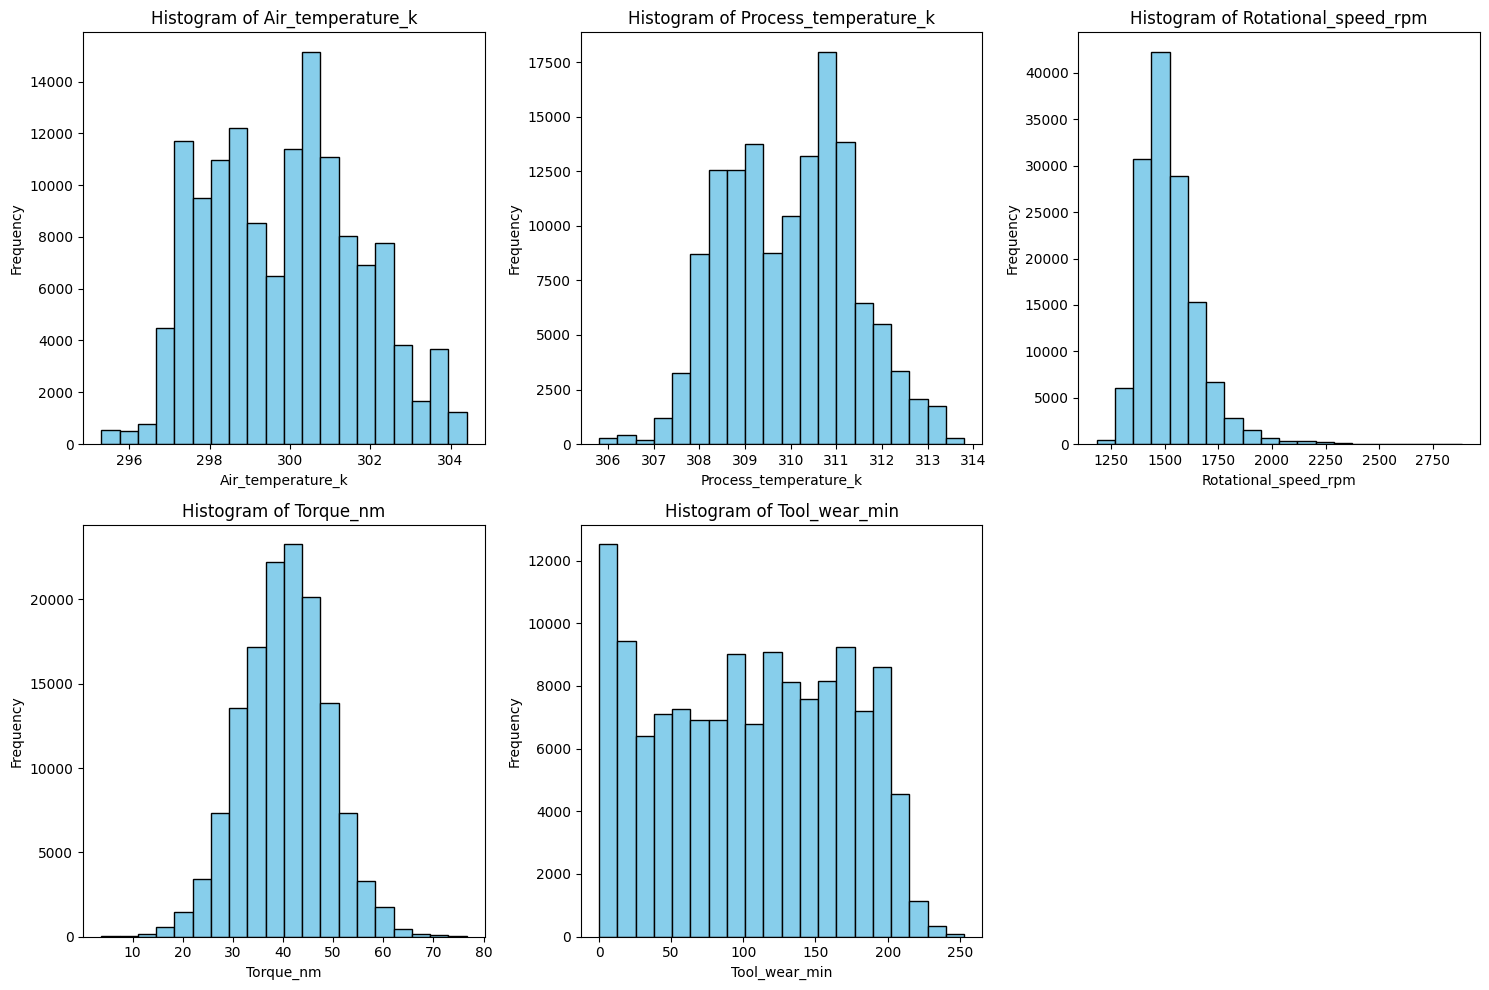

In [662]:
plot_histograms(column_names=num_cols)

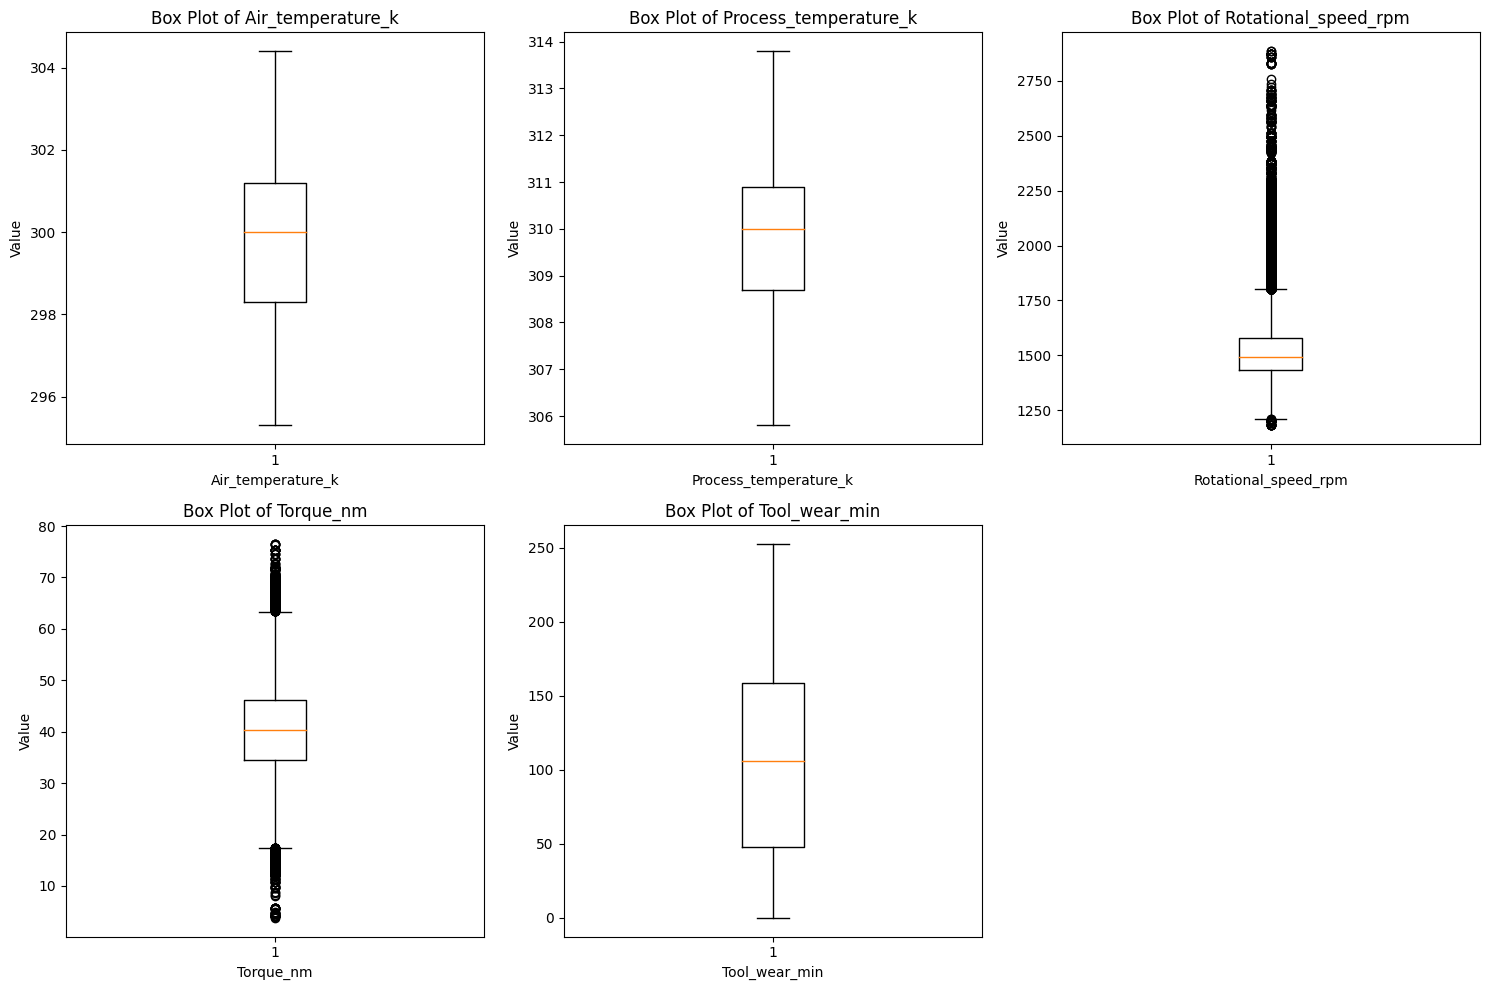

In [663]:
plot_boxplots(column_names=num_cols)

Creating New Features

In [664]:
def create_features(df=df):
    
    # Create a new feature by divided 'Air temperature' from 'Process temperature'
    df["Temperature_ratio"] = df['Process_temperature_K'] / df['Air_temperature_K']
    
    # Create a new feature by multiplying 'Torque' and 'Rotational speed'
    df['Torque * Rotational_speed'] = df['Torque_Nm'] * df['Rotational_speed_rpm']

    # Create a new feature by multiplying 'Torque' by 'Tool wear'
    #df['Torque * Tool wear'] = df['Torque_Nm'] * df['Tool_wear_min']

    # Create a new feature by multiplying 'Torque' by 'Rotational speed'
   # df['Torque * Rotational_speed'] = df['Torque_Nm'] * df['Rotational_speed_rpm']
    
    return df

In [665]:
df=create_features()
X_test=create_features(df=X_test)

In [666]:
new_Features=['Temperature_ratio','Torque * Rotational_speed','Torque * Tool wear','Torque * Rotational_speed']

In [667]:
df.head()

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,1.029940,57615.6
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1.031395,51186.9
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,1.030738,47832.5
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,1.032890,67513.2
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1.036913,58091.4


Error: Column 'Torque * Tool wear' not found in the DataFrame.


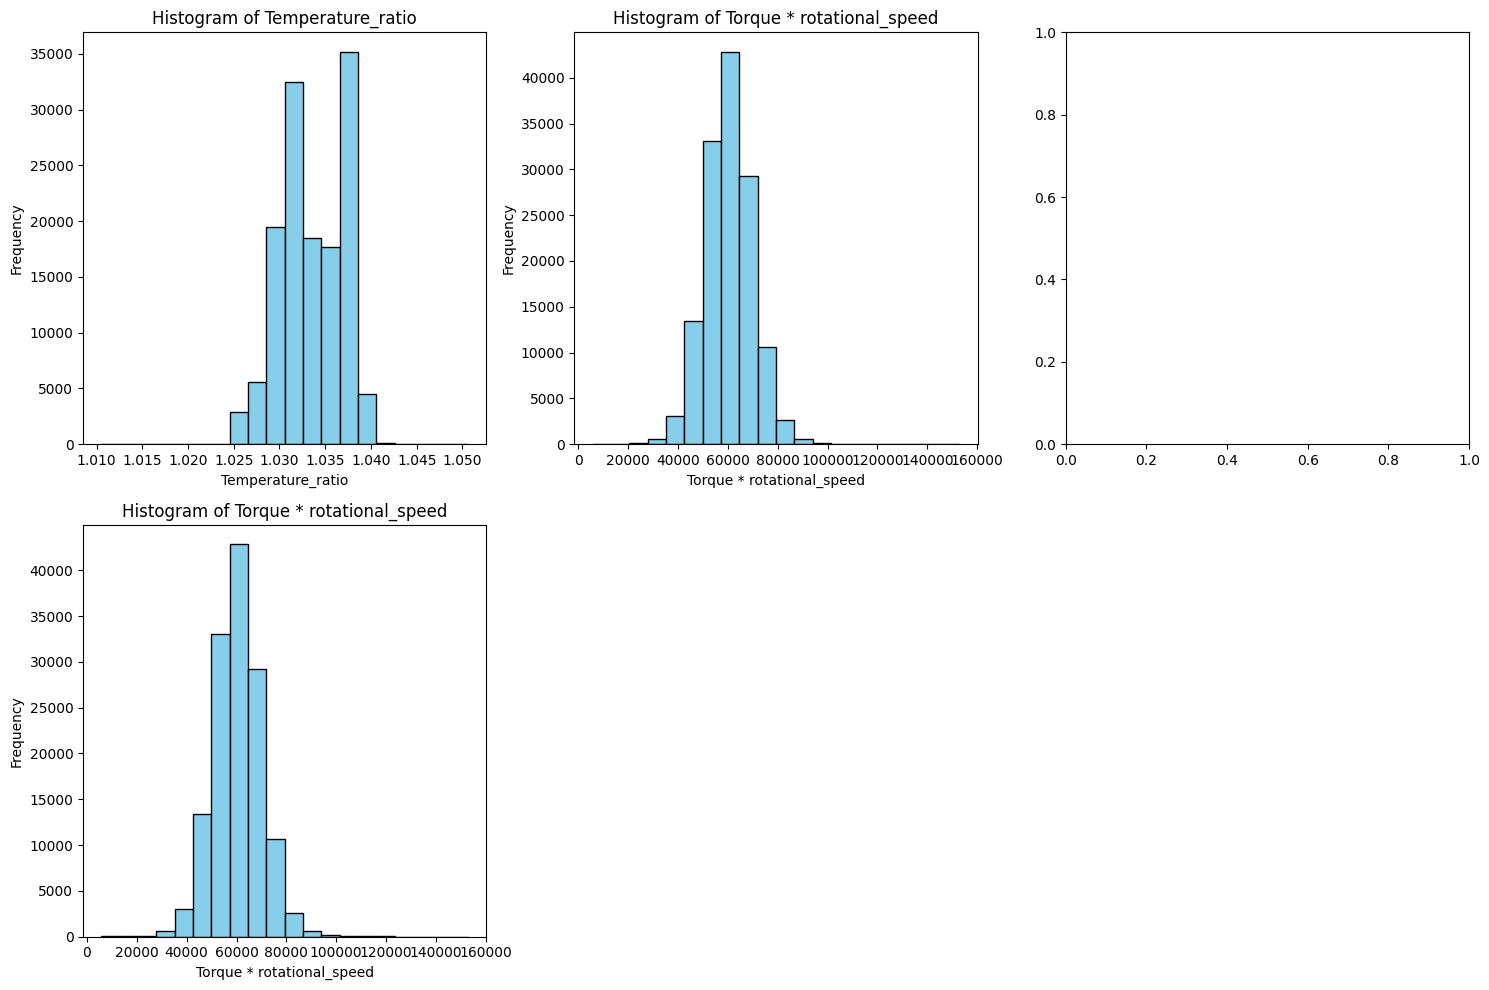

In [668]:
plot_histograms(column_names=new_Features)

Error: Column 'Torque * Tool wear' not found in the DataFrame.


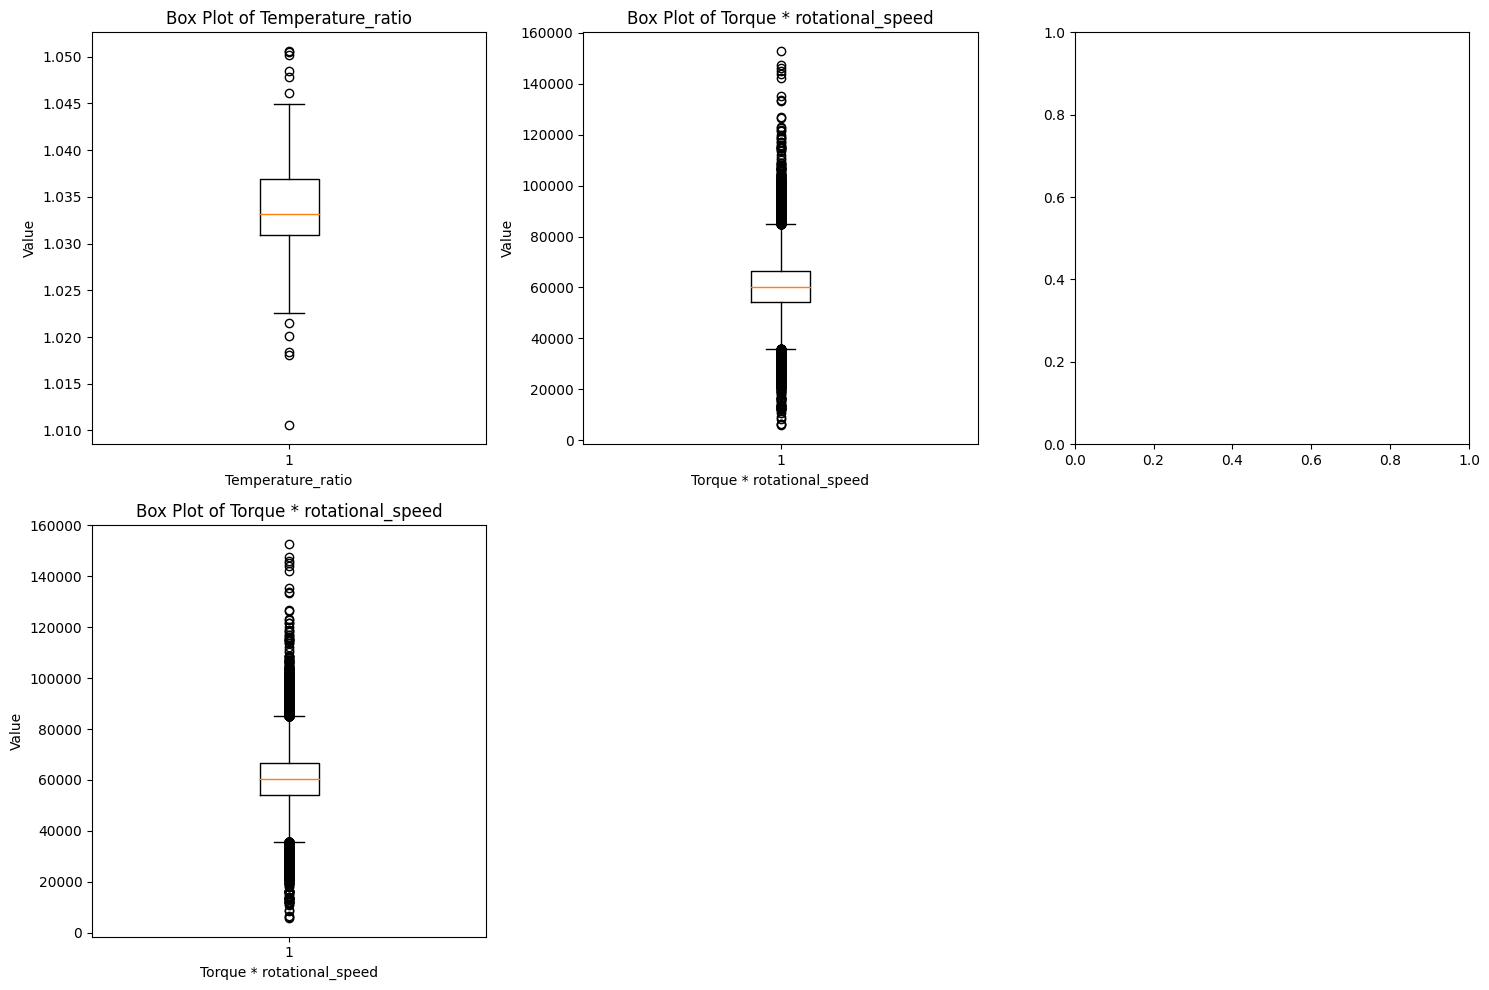

In [669]:
plot_boxplots(column_names=new_Features)

### Categorical Columns


In [670]:
cat_cols


['Product_ID', 'Type']

In [671]:
def plot_unique_value_counts(column_names,dataframe=df):
    """
    Function to plot the number of unique values and their percentages for specific columns in the given DataFrame.

    Parameters:
    dataframe (pandas.DataFrame): The DataFrame containing the data.
    column_names (list): List of column names for which the unique value counts will be plotted.

    Returns:
    None
    """
    num_plots = len(column_names)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (num_plots + 2) // 3
    num_cols = min(num_plots, 3)

    # Create a single plot for all columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axs = axs.ravel()

    for i, column_name in enumerate(column_names):
        # Check if the column_name exists in the DataFrame
        if column_name not in dataframe.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue

        # Get the unique value counts and their percentages for the column
        unique_value_counts = dataframe[column_name].nunique()
        total_values = len(dataframe[column_name])
        percentage = (unique_value_counts / total_values) * 100

        # Create the bar plot
        axs[i].bar([f'Unique Values'], [unique_value_counts], color='skyblue')
        axs[i].set_xlabel(column_name.capitalize())
        axs[i].set_ylabel('Number of Unique Values')
        axs[i].set_title(f'Number of Unique Values for {column_name.capitalize()}')

        # Annotate the bar plot with percentage values
        axs[i].text(0.5, 0.8, f'{percentage:.2f}%\n({unique_value_counts}/{total_values})',
                    horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)

    # Hide any remaining empty subplots
    for j in range(num_plots, num_rows * num_cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

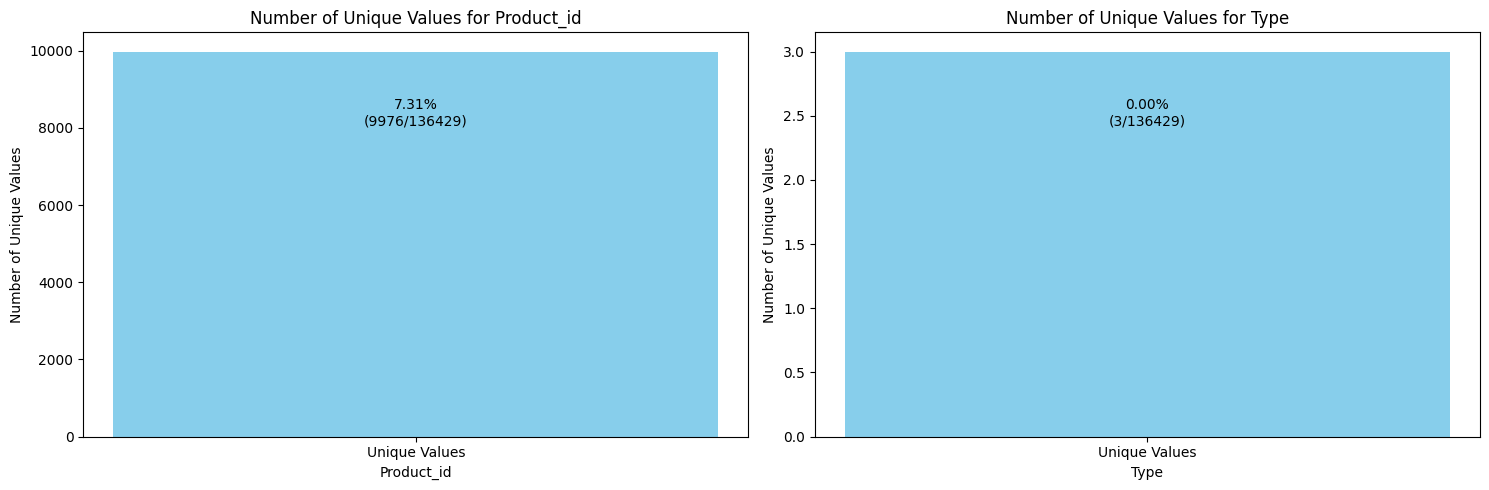

In [672]:
plot_unique_value_counts(column_names=cat_cols)

Product_Id

In [673]:
df[['Product_ID']].nunique()

Product_ID    9976
dtype: int64

Type

In [674]:
df[['Type']].nunique()

Type    3
dtype: int64

In [675]:
from category_encoders import OrdinalEncoder

In [676]:
def cat_encoder(df, cat_cols=cat_cols, handle_missing='value', handle_unknown='value'):
    """
    Encode categorical columns in the DataFrame using label encoding.

    Parameters:
        df (pd.DataFrame): Data with categorical columns to encode.
        cat_cols (list): List of column names to encode.
        handle_missing (str): Strategy for handling missing values: 'value' or 'return_nan'.
        handle_unknown (str): Strategy for handling unknown categories: 'value' or 'return_nan'.

    Returns:
        df (pd.DataFrame): DataFrame with label-encoded categorical columns.
        encoder (OrdinalEncoder): The fitted ordinal encoder object.
    """
    from copy import deepcopy
    import pandas as pd

    # Validate inputs
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df must be a pandas DataFrame.")
    if not set(cat_cols).issubset(df.columns):
        raise ValueError("cat_cols must be a subset of columns in df.")

    # Make a copy to avoid modifying the original data
    df = deepcopy(df)

    # Label Encoder
    encoder = OrdinalEncoder(cols=cat_cols, handle_missing=handle_missing, handle_unknown=handle_unknown)
    df[cat_cols] = encoder.fit_transform(df[cat_cols]).astype(int)

    return df, encoder

In [677]:
df, encoder=cat_encoder(df=df)


In [678]:
X_test,encoder=cat_encoder(df=X_test)

In [679]:
df

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed
0,1,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,1.029940,57615.6
1,2,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1.031395,51186.9
2,3,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,1.030738,47832.5
3,4,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,1.032890,67513.2
4,5,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1.036913,58091.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,607,2,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,1.037654,57375.0
136425,9103,3,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,1.036975,71047.7
136426,4659,1,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,1.037604,58674.0
136427,912,1,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,1.030494,66996.1


### Traget Column 

In [680]:
target_col

'Machine_failure'

In [681]:
df[target_col].nunique()

2

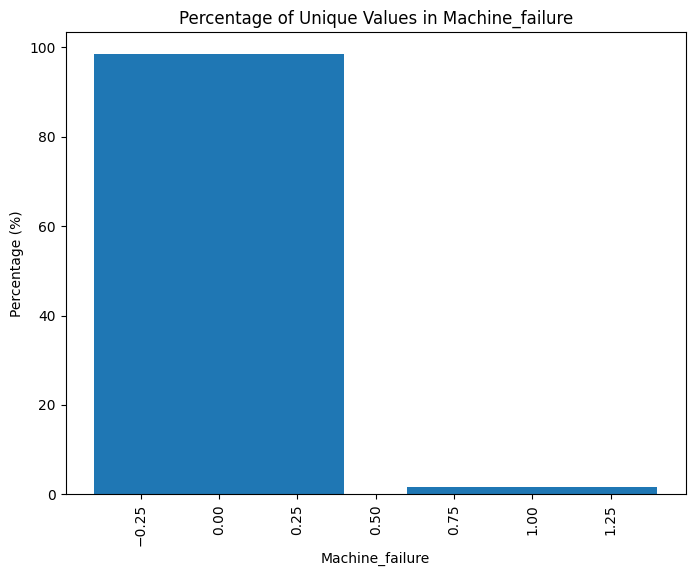

In [682]:

def plot_unique_value_percentage(df, target_column):
    # Get the counts of unique values in the target column
    value_counts = df[target_column].value_counts()
    
    # Calculate the percentage of each unique value
    total_values = len(df)
    percentages = (value_counts / total_values) * 100
    
    # Plot the percentage of unique values
    plt.figure(figsize=(8, 6))
    plt.bar(percentages.index, percentages.values)
    plt.xlabel(target_column)
    plt.ylabel('Percentage (%)')
    plt.title(f'Percentage of Unique Values in {target_column}')
    plt.xticks(rotation=90)
    plt.show()
    
plot_unique_value_percentage(df=df,target_column='Machine_failure')

### Input and Target

In [683]:
X_train=df.drop(columns='Machine_failure',axis=1)
y_train=df['Machine_failure']

In [684]:
y_train.shape

(136429,)

In [685]:
X_test=X_test.drop(columns='id',axis=1)

In [686]:
X_train

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed
0,1,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,1.029940,57615.6
1,2,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,1.031395,51186.9
2,3,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,1.030738,47832.5
3,4,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,1.032890,67513.2
4,5,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,1.036913,58091.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,607,2,300.1,311.4,1530,37.5,210,0,0,0,0,0,1.037654,57375.0
136425,9103,3,297.5,308.5,1447,49.1,2,0,0,0,0,0,1.036975,71047.7
136426,4659,1,300.5,311.8,1524,38.5,214,0,0,0,0,0,1.037604,58674.0
136427,912,1,301.7,310.9,1447,46.3,42,0,0,0,0,0,1.030494,66996.1


### Scaling 

In [687]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer

scaler = MinMaxScaler()

preprocessor = ColumnTransformer(transformers=[('num', scaler, X_train.columns)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_scaled = pipeline.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [688]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer(transformers=[('num', scaler, X_test.columns)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


X_test_scaled = pipeline.fit_transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [689]:
X_train_scaled

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed
0,0.000000,0.0,0.582418,0.4750,0.243402,0.443681,0.553360,0.0,0.0,0.0,0.0,0.0,0.484141,0.352222
1,0.000100,0.5,0.802198,0.7875,0.339003,0.347527,0.790514,0.0,0.0,0.0,0.0,0.0,0.520445,0.308497
2,0.000201,0.0,0.439560,0.3375,0.365982,0.311813,0.098814,0.0,0.0,0.0,0.0,0.0,0.504066,0.285682
3,0.000301,0.0,0.626374,0.6375,0.201173,0.556319,0.778656,0.0,0.0,0.0,0.0,0.0,0.557780,0.419540
4,0.000401,0.5,0.296703,0.4000,0.269795,0.434066,0.134387,0.0,0.0,0.0,0.0,0.0,0.658180,0.355458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.060752,0.5,0.527473,0.7000,0.204692,0.462912,0.830040,0.0,0.0,0.0,0.0,0.0,0.676685,0.350586
136425,0.912481,1.0,0.241758,0.3375,0.156012,0.622253,0.007905,0.0,0.0,0.0,0.0,0.0,0.659729,0.443580
136426,0.466967,0.0,0.571429,0.7500,0.201173,0.476648,0.845850,0.0,0.0,0.0,0.0,0.0,0.675434,0.359421
136427,0.091328,0.0,0.703297,0.6375,0.156012,0.583791,0.166008,0.0,0.0,0.0,0.0,0.0,0.497963,0.416023


In [690]:
X_test_scaled

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Temperature_ratio,Torque * Rotational_speed
0,0.000000,0.0,0.769231,0.716049,0.192666,0.469780,0.237154,0.0,0.0,0.0,0.0,0.0,0.454345,0.294539
1,0.000101,0.0,0.703297,0.654321,0.317229,0.343407,0.067194,0.0,0.0,0.0,0.0,0.0,0.463927,0.249698
2,0.000202,0.0,0.659341,0.580247,0.207800,0.465659,0.379447,0.0,0.0,0.0,0.0,0.0,0.448701,0.297658
3,0.000303,0.5,0.527473,0.481481,0.181024,0.601648,0.019763,0.0,0.0,0.0,0.0,0.0,0.484234,0.373541
4,0.000404,0.5,0.890110,0.814815,0.201979,0.515110,0.450593,0.0,0.0,0.0,0.0,0.0,0.427478,0.327505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,0.537142,0.0,0.769231,0.703704,0.183935,0.502747,0.059289,0.0,0.0,0.0,0.0,0.0,0.446259,0.312126
90950,0.273920,0.0,0.285714,0.506173,0.217695,0.412088,0.122530,0.0,0.0,0.0,0.0,0.0,0.686878,0.266072
90951,0.222245,0.0,0.032967,0.061728,0.193830,0.516484,0.739130,0.0,0.0,0.0,0.0,0.0,0.586975,0.324988
90952,0.634235,0.0,0.307692,0.259259,0.213038,0.501374,0.272727,0.0,0.0,0.0,0.0,0.0,0.505826,0.323100


### Splitter

In [691]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import pandas as pd

In [692]:
class Splitter:
    def __init__(self, kfold=True, n_splits=5, cat_df=pd.DataFrame(), test_size=0.3):
        self.n_splits = n_splits
        self.kfold = kfold
        self.cat_df = cat_df
        self.test_size = test_size

    def split_data(self, X, y, random_state_list=[42]):

        for random_state in random_state_list:
            kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
            for train_index, val_index in kf.split(X, self.cat_df):
                X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                yield X_train, X_val, y_train, y_val, val_index                        

### Models

In [693]:
import lightgbm as lgb
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


class ModelClassifier:
    def __init__(self):
        self.model_dict = {
            'LightGBM': lgb.LGBMClassifier(verbose=0),
            'CatBoost': CatBoostClassifier(silent=True, iterations=50),
            'XgBoost': xgb.XGBClassifier()
        }
        self.params = {
                        'LightGBM': {
                            'num_leaves': (10, 60),
                            'learning_rate': (0.01, 0.5),
                            'min_data_in_leaf': (10, 50),
                            'feature_fraction': (0.1, 0.9), 
                            'bagging_fraction': (0.5, 1.0)   
                        },
                        'CatBoost': {
                            'depth': (6, 16),
                            'learning_rate': (0.0, 0.5),
                            'l2_leaf_reg': (1, 10),
                            'iterations': (30, 30)
            
                        },
                        'XgBoost': {
                            'max_depth': (3, 50),
                            'learning_rate': (0.01, 0.4),
                            'n_estimators': (100, 500),
                            'min_child_weight': (1, 10)   
                        }
                    }   

    def fit_with_params(self, model_name, X, y):
        model = self.model_dict.get(model_name)
        if model:
            params = self.params.get(model_name, None)
            if params:
                print(f"Fitting {model_name} with specified parameters...")
                model.set_params(**params)
            else:
                print(f"Fitting {model_name} with default parameters.")
                # Implement fitting logic with default parameters

            return model.fit(X, y)
        else:
            raise ValueError(f"Model {model_name} not found. Please set the model first.")

    def fit_without_params(self, model_name, X, y):
        model = self.model_dict.get(model_name)
        if model:
            print(f"Fitting {model_name} without parameters.")
            return model.fit(X, y)
        else:
            raise ValueError(f"Model {model_name} not found. Please set the model first.")

### Model Predict 

In [694]:
from tqdm import tqdm

In [695]:
models=ModelClassifier()
# Create an instance of Splitter for k-fold cross-validation with 5 folds
splitter = Splitter(kfold=True, n_splits=10, cat_df=y_train)


results = []  # List to store the results for each model

for model_name, model in models.model_dict.items():
    print(f"Fitting model {model_name}")
    model_auc_scores = []  # List to store AUC scores for each cross-validation fold

    for X_Train, X_val, y_Train, y_val, val_index in tqdm(splitter.split_data(X=X_train_scaled, y=y_train)):
        # Fitting the model 
        fitted_model = models.fit_without_params(X=X_Train, y=y_Train, model_name=model_name)

        y_probs = fitted_model.predict_proba(X_val)  # Ensure y_probs is 2D
        auc_score = roc_auc_score(y_val, y_probs[:, 1])  # Access class 1 probabilities
        model_auc_scores.append(auc_score)

    # Calculate the mean AUC score for this model
    mean_auc_score = np.median(model_auc_scores)

    # Append the result to the results list
    results.append({'Model': model_name, 'Mean_AUC_Score': mean_auc_score})

# Convert the list of dictionaries into a DataFrame
auc_scores_df = pd.DataFrame(results)

print(auc_scores_df)
    


Fitting model LightGBM


0it [00:00, ?it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007054 seconds.
You can set `force_col_wise=true` to remove the overhead.


1it [00:00,  3.70it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


2it [00:00,  3.90it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


3it [00:00,  3.95it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


4it [00:01,  4.03it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


5it [00:01,  4.04it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


6it [00:01,  4.10it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006354 seconds.
You can set `force_col_wise=true` to remove the overhead.


7it [00:01,  4.10it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


8it [00:01,  4.10it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


9it [00:02,  4.13it/s]

Fitting LightGBM without parameters.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


10it [00:02,  4.08it/s]


Fitting model CatBoost


0it [00:00, ?it/s]

Fitting CatBoost without parameters.


1it [00:00,  3.08it/s]

Fitting CatBoost without parameters.


2it [00:00,  3.22it/s]

Fitting CatBoost without parameters.


3it [00:00,  3.25it/s]

Fitting CatBoost without parameters.


4it [00:01,  3.22it/s]

Fitting CatBoost without parameters.


5it [00:01,  3.26it/s]

Fitting CatBoost without parameters.


6it [00:01,  3.22it/s]

Fitting CatBoost without parameters.


7it [00:02,  3.21it/s]

Fitting CatBoost without parameters.


8it [00:02,  3.19it/s]

Fitting CatBoost without parameters.


9it [00:02,  3.13it/s]

Fitting CatBoost without parameters.


10it [00:03,  3.19it/s]


Fitting model XgBoost


0it [00:00, ?it/s]

Fitting XgBoost without parameters.


1it [00:02,  2.63s/it]

Fitting XgBoost without parameters.


1it [00:03,  3.35s/it]


KeyboardInterrupt: 

In [452]:
def choose_best_model(results_df):
    """
    Choose the best model based on the highest mean AUC score.

    Parameters:
        results_df (pd.DataFrame): DataFrame containing the model names and their mean AUC scores.

    Returns:
        str: The name of the best model.
    """
    best_model_name = results_df.loc[results_df['Mean_AUC_Score'].idxmax(), 'Model']
    return best_model_name

In [453]:
auc_scores_df

,Model,Mean_AUC_Score
0,LightGBM,0.966762
1,CatBoost,0.962587
2,XgBoost,0.963245


In [454]:
best_model=choose_best_model(results_df=auc_scores_df)

In [455]:
best_model

'LightGBM'

### Feature Selection (RFE-CV)

### Ensemble 

In [696]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score

In [697]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class VotingEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, estimators, voting='hard'):
        self.estimators = estimators
        self.voting = voting

    def fit(self, X, y):
        for _, model in self.estimators:
            model.fit(X, y)
        return self

    def predict(self, X):
        if self.voting == 'hard':
            predictions = np.asarray([model.predict(X) for _, model in self.estimators])
            return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
        elif self.voting == 'soft':
            probabilities = np.asarray([model.predict_proba(X) for _, model in self.estimators])
            return np.argmax(np.mean(probabilities, axis=0), axis=1)
        else:
            raise ValueError(f"Invalid voting method: {self.voting}. Use 'hard' or 'soft'.")




### Training with Params

### Optuna

In [698]:
import optuna

In [699]:
import optuna
from functools import partial
from sklearn.base import is_classifier
from sklearn.metrics import roc_auc_score

In [700]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

class OptunaTuner_Catboost:
    def __init__(self, model, params, X, y):
        self.model = model
        self.params = params
        self.X = X
        self.y = y

    def Objective(self, trial):
        param_values = {}
        for key, value_range in self.params.items():
            if isinstance(value_range, tuple):  # Check if value_range is a tuple
                if value_range[0] <= value_range[1]:
                    if isinstance(value_range[0], int) and isinstance(value_range[1], int):
                        param_values[key] = trial.suggest_int(key, value_range[0], value_range[1])
                    else:
                        param_values[key] = trial.suggest_float(key, value_range[0], value_range[1])
                else:
                    raise ValueError(f"Invalid range for {key}: low={value_range[0]}, high={value_range[1]}")
            else:  # If value_range is not a tuple, treat it as a single value
                param_values[key] = value_range

        model = CatBoostClassifier(**param_values)
        
        # Initialize an empty list to store AUC-ROC scores from different folds
        auc_scores = []

        # Use the external data splitter for data splitting
        for X_Train, X_val, y_Train, y_val, val_index in tqdm(splitter.split_data(X=self.X, y=self.y)):
            # Perform tuning for each fold
            model.fit(X_Train, y_Train)  # Fit the model on the training data of this fold

            # Evaluate the model using AUC-ROC on the validation data of this fold
            y_probs = model.predict_proba(X_val)[:, 1]  # Get predicted probabilities for the positive class
            auc_roc = roc_auc_score(y_val, y_probs)
            
            
            # Append the AUC-ROC score of this fold to the list
            auc_scores.append(auc_roc)

        # Compute the average AUC-ROC score across all folds
        avg_auc_score = sum(auc_scores) / len(auc_scores)

        return avg_auc_score




    def tune(self, n_trials=100):
        study = optuna.create_study(direction="maximize")  # maximize AUC-ROC

        # Perform Optuna tuning
        study.optimize(self.Objective, n_trials=n_trials)

        best_params = study.best_params
        print(f"Best parameters: {best_params}")

        # Create a new CatBoost model instance with the best parameters
        best_model = CatBoostClassifier(**best_params)

        # Train the best model on the whole dataset
        best_model.fit(self.X, self.y)

        best_auc_score = study.best_value
        print(f"Best AUC Score: {best_auc_score}")

        # Here, we return both the tuned model and the best AUC-ROC score
        return best_auc_score, best_model


In [701]:
import optuna
from sklearn.metrics import roc_auc_score

class OptunaTuner:
    def __init__(self, model, params, X, y, splitter=splitter):
        self.model = model
        self.params = params
        self.X = X
        self.y = y
        self.splitter = splitter  # Assuming a data splitter object is passed

    def Objective(self, trial):
        param_values = {}
        for key, value_range in self.params.items():
            if value_range[0] <= value_range[1]:
                if isinstance(value_range[0], int) and isinstance(value_range[1], int):
                    param_values[key] = trial.suggest_int(key, value_range[0], value_range[1])
                else:
                    param_values[key] = trial.suggest_float(key, value_range[0], value_range[1])
            else:
                raise ValueError(f"Invalid range for {key}: low={value_range[0]}, high={value_range[1]}")

        self.model.set_params(**param_values)

        # Initialize an empty list to store AUC-ROC scores from different folds
        auc_scores = []

        for X_Train, X_val, y_Train, y_val, val_index in tqdm(self.splitter.split_data(X=self.X, y=self.y)):
            # Fit the model on the training data of this fold
            self.model.fit(X_Train, y_Train)

            # Evaluate the model using AUC-ROC on the validation data of this fold
            y_probs = self.model.predict_proba(X_val)[:, 1]
            auc_roc = roc_auc_score(y_val, y_probs)

            # Append the AUC-ROC score of this fold to the list
            auc_scores.append(auc_roc)

        # Compute the average AUC-ROC score across all folds
        avg_auc_score = sum(auc_scores) / len(auc_scores)

        return avg_auc_score

    def tune(self, n_trials=100):
        study = optuna.create_study(direction="maximize")  # maximize average AUC-ROC score
        study.optimize(self.Objective, n_trials=n_trials)

        best_params = study.best_params
        print(f"Best parameters: {best_params}")

        # Set the best parameters to the model
        self.model.set_params(**best_params)

        print(f"Best AUC Score: {study.best_value}")

        # Here, we return both the tuned model and the best AUC-ROC score
        return study.best_value, self.model

In [721]:
models = ModelClassifier()

results = {}  # Dictionary to store the best models and their AUC scores

# List to store the tuned models
tuned_models = []

for model_name, model in models.model_dict.items():
    if model_name == 'CatBoost':

        print(f"Tuning and fitting model ----------->>>>  {model_name}")

        # Create an instance of OptunaTuner for each model
        tuner = OptunaTuner_Catboost(model, params=models.params[model_name], X=X_train_scaled, y=y_train)

        # Perform hyperparameter tuning
        best_auc_score, tuned_model = tuner.tune(n_trials=5)

        print(f"Best AUC score for {model_name}: {best_auc_score}")
        print("----------------------")

        # Append the tuned model to the list of tuned models
        tuned_models.append((model_name, tuned_model))
        
        results[model_name] = best_auc_score
        
        
    else: 
        
        print(f"Tuning and fitting model ----------->>>>  {model_name}")

        # Create an instance of OptunaTuner for each model
        tuner = OptunaTuner(model, params=models.params[model_name], X=X_train_scaled, y=y_train)

        # Perform hyperparameter tuning
        best_auc_score, tuned_model = tuner.tune(n_trials=5)

        print(f"Best AUC score for {model_name}: {best_auc_score}")
        print("----------------------")

        # Append the tuned model to the list of tuned models
        tuned_models.append((model_name, tuned_model))
        
        results[model_name] = best_auc_score
        
# Convert the 'results' dictionary to a DataFrame
result_df = pd.DataFrame(results.items(), columns=['Model', 'Best AUC Score'])


[I 2023-08-04 23:13:22,350] A new study created in memory with name: no-name-1b80fa72-c751-4729-902e-2f5a6b7a0246


Tuning and fitting model ----------->>>>  LightGBM


0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead 

1it [00:00,  3.61it/s]

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will

2it [00:00,  3.51it/s]

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will

3it [00:00,  3.54it/s]

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will

4it [00:01,  3.56it/s]

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will

5it [00:01,  3.69it/s]

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will

6it [00:01,  3.75it/s]

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will

7it [00:01,  3.76it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. C

8it [00:02,  3.81it/s]

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will

9it [00:02,  3.84it/s]

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will

10it [00:02,  3.74it/s]
[I 2023-08-04 23:13:25,033] Trial 0 finished with value: 0.7729890903714633 and parameters: {'num_leaves': 31, 'learning_rate': 0.3715604600831739, 'min_data_in_leaf': 34, 'feature_fraction': 0.6197280258452494, 'bagging_fraction': 0.5949273709270857}. Best is trial 0 with value: 0.7729890903714633.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.6197280258452494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197280258452494
[LightGBM] [Warning] bagging_fraction is set=0.5949273709270857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5949273709270857


0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.37688109840837114, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37688109840837114
[LightGBM] [Warning] bagging_fraction is set=0.7572812891702716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7572812891702716
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] feature_fraction is set=0.37688109840837114, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37688109840837114
[LightGBM] [Warning] bagging_fraction is set=0.7572812891702716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7572812891702716
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overh

1it [00:00,  3.04it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the sp

2it [00:00,  3.19it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

3it [00:00,  3.26it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

4it [00:01,  3.21it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

5it [00:01,  3.31it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

6it [00:01,  3.32it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits wit

7it [00:02,  3.30it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

8it [00:02,  3.32it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

9it [00:02,  3.32it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

10it [00:03,  3.28it/s]
[I 2023-08-04 23:13:28,084] Trial 1 finished with value: 0.5526439315642838 and parameters: {'num_leaves': 31, 'learning_rate': 0.39673433265781527, 'min_data_in_leaf': 32, 'feature_fraction': 0.37688109840837114, 'bagging_fraction': 0.7572812891702716}. Best is trial 0 with value: 0.7729890903714633.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overh

1it [00:00,  3.04it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Found whitespace in feature_names, replace with underl

2it [00:00,  3.17it/s]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 

3it [00:00,  3.20it/s]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 

4it [00:01,  3.20it/s]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overh

5it [00:01,  3.23it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Found whitespace in feature_names, replace with underl

6it [00:01,  3.15it/s]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overh

7it [00:02,  3.14it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565


8it [00:02,  3.09it/s]

[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 

9it [00:02,  3.09it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.172989014258163

10it [00:03,  3.09it/s]
[I 2023-08-04 23:13:31,321] Trial 2 finished with value: 0.9684806083196102 and parameters: {'num_leaves': 52, 'learning_rate': 0.14924572495115657, 'min_data_in_leaf': 46, 'feature_fraction': 0.17298901425816304, 'bagging_fraction': 0.6363450936086565}. Best is trial 2 with value: 0.9684806083196102.


[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] feature_fraction is set=0.17298901425816304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17298901425816304
[LightGBM] [Warning] bagging_fraction is set=0.6363450936086565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363450936086565


0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.1788666736548218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1788666736548218
[LightGBM] [Warning] bagging_fraction is set=0.6886648169995241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6886648169995241
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.1788666736548218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1788666736548218
[LightGBM] [Warning] bagging_fraction is set=0.6886648169995241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6886648169995241
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead 

1it [00:00,  3.49it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

2it [00:00,  3.54it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

3it [00:00,  3.57it/s]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.1788666736548218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1788666736548218
[LightGBM] [Warning] bagging_fraction is set=0.6886648169995241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6886648169995241
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.1788666736548218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1788666736548218
[LightGBM] [Warning] bagging_fraction is set=0.6886648169995241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6886648169995241
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead 

4it [00:01,  3.58it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

5it [00:01,  3.62it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

6it [00:01,  3.60it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

7it [00:01,  3.50it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

8it [00:02,  3.49it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.1788666736548218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1788666736548218
[LightGBM] [Warning] bagging_fraction is set=0.6886648169995241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6886648169995241
[LightGBM] [Warning] min_data_in_leaf is

9it [00:02,  3.60it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.1788666736548218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1788666736548218
[LightGBM] [Warning] bagging_fraction is set=0.6886648169995241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6886648169995241
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.1788666736548218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1788666736548218
[LightGBM] [Warning] bagging_fraction is set=0.6886648169995241, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6886648169995241
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines

10it [00:02,  3.58it/s]
[I 2023-08-04 23:13:34,116] Trial 3 finished with value: 0.6093196432253729 and parameters: {'num_leaves': 13, 'learning_rate': 0.43668239130117026, 'min_data_in_leaf': 20, 'feature_fraction': 0.1788666736548218, 'bagging_fraction': 0.6886648169995241}. Best is trial 2 with value: 0.9684806083196102.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

0it [00:00, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead 

1it [00:00,  3.66it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will

2it [00:00,  4.02it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will

3it [00:00,  4.18it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will

4it [00:00,  4.37it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will

5it [00:01,  4.36it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will

6it [00:01,  4.37it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will

7it [00:01,  4.37it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will

8it [00:01,  4.37it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will

9it [00:02,  4.42it/s]

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will

10it [00:02,  4.36it/s]
[I 2023-08-04 23:13:36,412] Trial 4 finished with value: 0.965654207889561 and parameters: {'num_leaves': 11, 'learning_rate': 0.06104021367164239, 'min_data_in_leaf': 27, 'feature_fraction': 0.8767109779459468, 'bagging_fraction': 0.8652433935858832}. Best is trial 2 with value: 0.9684806083196102.
[I 2023-08-04 23:13:36,413] A new study created in memory with name: no-name-ec04631f-de0b-42e9-98a0-48d021b99156


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.8767109779459468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8767109779459468
[LightGBM] [Warning] bagging_fraction is set=0.8652433935858832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8652433935858832
Best parameters: {'num_leaves': 52, 'learning_rate': 0.14924572495115657, 'min_data_in_leaf': 46, 'feature_fraction': 0.17298901425816304, 'bagging_fraction': 0.6363450936086565}
Best AUC Score: 0.9684806083196102
Best AUC score for LightGBM: 0.9684806083196102
----------------------
Tuning and fitting model ----------->>>>  CatBoost


0it [00:00, ?it/s]

0:	learn: 0.4675411	total: 39ms	remaining: 1.13s
1:	learn: 0.3340735	total: 75.5ms	remaining: 1.06s
2:	learn: 0.2458099	total: 90.8ms	remaining: 817ms
3:	learn: 0.1851064	total: 114ms	remaining: 741ms
4:	learn: 0.1421269	total: 139ms	remaining: 695ms
5:	learn: 0.1110697	total: 180ms	remaining: 722ms
6:	learn: 0.0879398	total: 194ms	remaining: 638ms
7:	learn: 0.0710130	total: 230ms	remaining: 634ms
8:	learn: 0.0583259	total: 271ms	remaining: 632ms
9:	learn: 0.0488581	total: 311ms	remaining: 622ms
10:	learn: 0.0418253	total: 317ms	remaining: 548ms
11:	learn: 0.0365933	total: 357ms	remaining: 536ms
12:	learn: 0.0326237	total: 401ms	remaining: 525ms
13:	learn: 0.0297284	total: 441ms	remaining: 504ms
14:	learn: 0.0274851	total: 480ms	remaining: 480ms
15:	learn: 0.0257364	total: 520ms	remaining: 455ms
16:	learn: 0.0245611	total: 561ms	remaining: 429ms
17:	learn: 0.0235915	total: 603ms	remaining: 402ms
18:	learn: 0.0228676	total: 644ms	remaining: 373ms
19:	learn: 0.0223070	total: 690ms	remain

1it [00:01,  1.22s/it]

26:	learn: 0.0207986	total: 986ms	remaining: 110ms
27:	learn: 0.0207112	total: 1.02s	remaining: 73.2ms
28:	learn: 0.0205969	total: 1.06s	remaining: 36.6ms
29:	learn: 0.0205317	total: 1.1s	remaining: 0us
0:	learn: 0.4675523	total: 49.9ms	remaining: 1.45s
1:	learn: 0.3341156	total: 97.6ms	remaining: 1.37s
2:	learn: 0.2458838	total: 112ms	remaining: 1.01s
3:	learn: 0.1852072	total: 136ms	remaining: 883ms
4:	learn: 0.1422509	total: 159ms	remaining: 793ms
5:	learn: 0.1112217	total: 200ms	remaining: 799ms
6:	learn: 0.0881218	total: 215ms	remaining: 707ms
7:	learn: 0.0712112	total: 259ms	remaining: 713ms
8:	learn: 0.0584979	total: 305ms	remaining: 712ms
9:	learn: 0.0490837	total: 347ms	remaining: 693ms
10:	learn: 0.0420718	total: 353ms	remaining: 610ms
11:	learn: 0.0368601	total: 394ms	remaining: 591ms
12:	learn: 0.0329492	total: 418ms	remaining: 546ms
13:	learn: 0.0299107	total: 459ms	remaining: 524ms
14:	learn: 0.0275923	total: 503ms	remaining: 503ms
15:	learn: 0.0261599	total: 509ms	remain

2it [00:02,  1.19s/it]

25:	learn: 0.0210918	total: 929ms	remaining: 143ms
26:	learn: 0.0209882	total: 975ms	remaining: 108ms
27:	learn: 0.0208574	total: 1.02s	remaining: 72.8ms
28:	learn: 0.0208041	total: 1.03s	remaining: 35.4ms
29:	learn: 0.0206872	total: 1.07s	remaining: 0us
0:	learn: 0.4675555	total: 55ms	remaining: 1.6s
1:	learn: 0.3340977	total: 96ms	remaining: 1.34s
2:	learn: 0.2458413	total: 112ms	remaining: 1.01s
3:	learn: 0.1851435	total: 135ms	remaining: 881ms
4:	learn: 0.1421671	total: 159ms	remaining: 793ms
5:	learn: 0.1111189	total: 198ms	remaining: 791ms
6:	learn: 0.0880003	total: 212ms	remaining: 697ms
7:	learn: 0.0710908	total: 250ms	remaining: 688ms
8:	learn: 0.0584227	total: 291ms	remaining: 680ms
9:	learn: 0.0491225	total: 334ms	remaining: 668ms
10:	learn: 0.0420924	total: 341ms	remaining: 589ms
11:	learn: 0.0368683	total: 379ms	remaining: 569ms
12:	learn: 0.0329203	total: 417ms	remaining: 545ms
13:	learn: 0.0298786	total: 458ms	remaining: 524ms
14:	learn: 0.0275832	total: 501ms	remaining:

3it [00:03,  1.16s/it]

27:	learn: 0.0210117	total: 933ms	remaining: 66.6ms
28:	learn: 0.0208743	total: 976ms	remaining: 33.7ms
29:	learn: 0.0207914	total: 1.02s	remaining: 0us
0:	learn: 0.4674942	total: 41.5ms	remaining: 1.2s
1:	learn: 0.3340200	total: 86ms	remaining: 1.2s
2:	learn: 0.2457607	total: 103ms	remaining: 931ms
3:	learn: 0.1850655	total: 129ms	remaining: 836ms
4:	learn: 0.1420827	total: 153ms	remaining: 765ms
5:	learn: 0.1110306	total: 196ms	remaining: 785ms
6:	learn: 0.0879072	total: 213ms	remaining: 699ms
7:	learn: 0.0709771	total: 257ms	remaining: 706ms
8:	learn: 0.0584619	total: 301ms	remaining: 703ms
9:	learn: 0.0491000	total: 343ms	remaining: 685ms
10:	learn: 0.0420514	total: 349ms	remaining: 603ms
11:	learn: 0.0368237	total: 394ms	remaining: 591ms
12:	learn: 0.0327511	total: 442ms	remaining: 578ms
13:	learn: 0.0299014	total: 451ms	remaining: 515ms
14:	learn: 0.0275676	total: 494ms	remaining: 494ms
15:	learn: 0.0258733	total: 539ms	remaining: 471ms
16:	learn: 0.0247180	total: 583ms	remaining

4it [00:04,  1.21s/it]

29:	learn: 0.0206241	total: 1.19s	remaining: 0us
0:	learn: 0.4676412	total: 44.2ms	remaining: 1.28s
1:	learn: 0.3337376	total: 90.8ms	remaining: 1.27s
2:	learn: 0.2456725	total: 108ms	remaining: 968ms
3:	learn: 0.1851073	total: 135ms	remaining: 878ms
4:	learn: 0.1422281	total: 162ms	remaining: 812ms
5:	learn: 0.1112515	total: 207ms	remaining: 828ms
6:	learn: 0.0882027	total: 223ms	remaining: 731ms
7:	learn: 0.0713363	total: 265ms	remaining: 727ms
8:	learn: 0.0587271	total: 306ms	remaining: 714ms
9:	learn: 0.0493263	total: 347ms	remaining: 695ms
10:	learn: 0.0423252	total: 355ms	remaining: 613ms
11:	learn: 0.0371247	total: 398ms	remaining: 596ms
12:	learn: 0.0333518	total: 438ms	remaining: 573ms
13:	learn: 0.0304115	total: 478ms	remaining: 547ms
14:	learn: 0.0281436	total: 521ms	remaining: 521ms
15:	learn: 0.0264917	total: 561ms	remaining: 491ms
16:	learn: 0.0251787	total: 601ms	remaining: 460ms
17:	learn: 0.0243345	total: 639ms	remaining: 426ms
18:	learn: 0.0236187	total: 677ms	remaini

5it [00:06,  1.21s/it]

27:	learn: 0.0212695	total: 1.03s	remaining: 73.7ms
28:	learn: 0.0211531	total: 1.07s	remaining: 37ms
29:	learn: 0.0210929	total: 1.11s	remaining: 0us
0:	learn: 0.4675383	total: 39.2ms	remaining: 1.14s
1:	learn: 0.3337758	total: 80.8ms	remaining: 1.13s
2:	learn: 0.2456281	total: 96.4ms	remaining: 867ms
3:	learn: 0.1849961	total: 121ms	remaining: 785ms
4:	learn: 0.1420676	total: 143ms	remaining: 717ms
5:	learn: 0.1110567	total: 182ms	remaining: 729ms
6:	learn: 0.0879744	total: 197ms	remaining: 647ms
7:	learn: 0.0710934	total: 235ms	remaining: 647ms
8:	learn: 0.0584577	total: 274ms	remaining: 640ms
9:	learn: 0.0491810	total: 315ms	remaining: 631ms
10:	learn: 0.0421675	total: 322ms	remaining: 557ms
11:	learn: 0.0369112	total: 363ms	remaining: 544ms
12:	learn: 0.0328677	total: 401ms	remaining: 524ms
13:	learn: 0.0299444	total: 441ms	remaining: 504ms
14:	learn: 0.0278145	total: 456ms	remaining: 456ms
15:	learn: 0.0263716	total: 463ms	remaining: 405ms
16:	learn: 0.0250543	total: 502ms	remain

6it [00:07,  1.19s/it]

28:	learn: 0.0209024	total: 991ms	remaining: 34.2ms
29:	learn: 0.0208298	total: 1.04s	remaining: 0us
0:	learn: 0.4674503	total: 45.9ms	remaining: 1.33s
1:	learn: 0.3336138	total: 88.5ms	remaining: 1.24s
2:	learn: 0.2453921	total: 106ms	remaining: 952ms
3:	learn: 0.1847076	total: 131ms	remaining: 848ms
4:	learn: 0.1417244	total: 154ms	remaining: 768ms
5:	learn: 0.1106788	total: 193ms	remaining: 771ms
6:	learn: 0.0875538	total: 209ms	remaining: 687ms
7:	learn: 0.0706054	total: 248ms	remaining: 682ms
8:	learn: 0.0579377	total: 288ms	remaining: 671ms
9:	learn: 0.0485955	total: 329ms	remaining: 658ms
10:	learn: 0.0415406	total: 336ms	remaining: 580ms
11:	learn: 0.0363820	total: 376ms	remaining: 564ms
12:	learn: 0.0324763	total: 416ms	remaining: 544ms
13:	learn: 0.0295299	total: 455ms	remaining: 520ms
14:	learn: 0.0271700	total: 497ms	remaining: 497ms
15:	learn: 0.0256397	total: 511ms	remaining: 447ms
16:	learn: 0.0245918	total: 517ms	remaining: 395ms
17:	learn: 0.0235841	total: 557ms	remain

7it [00:08,  1.16s/it]

28:	learn: 0.0203358	total: 951ms	remaining: 32.8ms
29:	learn: 0.0202686	total: 991ms	remaining: 0us
0:	learn: 0.4675669	total: 43.2ms	remaining: 1.25s
1:	learn: 0.3336152	total: 82.5ms	remaining: 1.15s
2:	learn: 0.2455158	total: 98.1ms	remaining: 883ms
3:	learn: 0.1849174	total: 123ms	remaining: 799ms
4:	learn: 0.1420123	total: 148ms	remaining: 738ms
5:	learn: 0.1110159	total: 187ms	remaining: 747ms
6:	learn: 0.0879395	total: 201ms	remaining: 661ms
7:	learn: 0.0710479	total: 240ms	remaining: 660ms
8:	learn: 0.0583588	total: 279ms	remaining: 650ms
9:	learn: 0.0488551	total: 323ms	remaining: 646ms
10:	learn: 0.0418644	total: 331ms	remaining: 572ms
11:	learn: 0.0366866	total: 371ms	remaining: 556ms
12:	learn: 0.0326934	total: 410ms	remaining: 536ms
13:	learn: 0.0296466	total: 451ms	remaining: 515ms
14:	learn: 0.0273296	total: 492ms	remaining: 492ms
15:	learn: 0.0258330	total: 508ms	remaining: 445ms
16:	learn: 0.0248146	total: 515ms	remaining: 394ms
17:	learn: 0.0238631	total: 556ms	remai

8it [00:09,  1.14s/it]

29:	learn: 0.0208230	total: 1.02s	remaining: 0us
0:	learn: 0.4674892	total: 48.6ms	remaining: 1.41s
1:	learn: 0.3340109	total: 88.9ms	remaining: 1.24s
2:	learn: 0.2457464	total: 103ms	remaining: 930ms
3:	learn: 0.1850403	total: 127ms	remaining: 827ms
4:	learn: 0.1420526	total: 150ms	remaining: 751ms
5:	learn: 0.1109912	total: 188ms	remaining: 750ms
6:	learn: 0.0878693	total: 202ms	remaining: 663ms
7:	learn: 0.0709488	total: 239ms	remaining: 658ms
8:	learn: 0.0584302	total: 277ms	remaining: 646ms
9:	learn: 0.0489736	total: 317ms	remaining: 634ms
10:	learn: 0.0419391	total: 325ms	remaining: 561ms
11:	learn: 0.0367214	total: 366ms	remaining: 549ms
12:	learn: 0.0326696	total: 405ms	remaining: 529ms
13:	learn: 0.0296847	total: 443ms	remaining: 507ms
14:	learn: 0.0273998	total: 482ms	remaining: 482ms
15:	learn: 0.0259260	total: 519ms	remaining: 454ms
16:	learn: 0.0246131	total: 559ms	remaining: 428ms
17:	learn: 0.0236068	total: 597ms	remaining: 398ms
18:	learn: 0.0228155	total: 634ms	remaini

9it [00:10,  1.15s/it]

27:	learn: 0.0207363	total: 1.01s	remaining: 71.9ms
28:	learn: 0.0206357	total: 1.05s	remaining: 36.1ms
29:	learn: 0.0205789	total: 1.05s	remaining: 0us
0:	learn: 0.4675116	total: 41.8ms	remaining: 1.21s
1:	learn: 0.3340365	total: 87.4ms	remaining: 1.22s
2:	learn: 0.2457808	total: 106ms	remaining: 957ms
3:	learn: 0.1850891	total: 134ms	remaining: 869ms
4:	learn: 0.1421099	total: 160ms	remaining: 799ms
5:	learn: 0.1110568	total: 219ms	remaining: 875ms
6:	learn: 0.0879354	total: 235ms	remaining: 772ms
7:	learn: 0.0710195	total: 277ms	remaining: 761ms
8:	learn: 0.0584950	total: 320ms	remaining: 747ms
9:	learn: 0.0491309	total: 366ms	remaining: 733ms
10:	learn: 0.0420835	total: 374ms	remaining: 646ms
11:	learn: 0.0368285	total: 413ms	remaining: 620ms
12:	learn: 0.0327928	total: 452ms	remaining: 591ms
13:	learn: 0.0299030	total: 491ms	remaining: 561ms
14:	learn: 0.0276607	total: 530ms	remaining: 530ms
15:	learn: 0.0259787	total: 573ms	remaining: 501ms
16:	learn: 0.0247408	total: 613ms	remai

10it [00:11,  1.18s/it]
[I 2023-08-04 23:13:48,203] Trial 0 finished with value: 0.9610520962520545 and parameters: {'depth': 11, 'learning_rate': 0.26731612010511735, 'l2_leaf_reg': 7, 'iterations': 30}. Best is trial 0 with value: 0.9610520962520545.


27:	learn: 0.0208881	total: 1.06s	remaining: 75.7ms
28:	learn: 0.0207852	total: 1.1s	remaining: 38ms
29:	learn: 0.0206501	total: 1.14s	remaining: 0us


0it [00:00, ?it/s]

0:	learn: 0.3867186	total: 71.4ms	remaining: 2.07s
1:	learn: 0.2445833	total: 322ms	remaining: 4.5s
2:	learn: 0.1610236	total: 329ms	remaining: 2.96s
3:	learn: 0.1110474	total: 355ms	remaining: 2.31s
4:	learn: 0.0794526	total: 378ms	remaining: 1.89s
5:	learn: 0.0597137	total: 934ms	remaining: 3.73s
6:	learn: 0.0467147	total: 1.45s	remaining: 4.76s
7:	learn: 0.0378256	total: 1.46s	remaining: 4.01s
8:	learn: 0.0320622	total: 1.98s	remaining: 4.63s
9:	learn: 0.0285527	total: 2.5s	remaining: 5s
10:	learn: 0.0259402	total: 2.99s	remaining: 5.17s
11:	learn: 0.0241682	total: 3.48s	remaining: 5.22s
12:	learn: 0.0230597	total: 4.04s	remaining: 5.28s
13:	learn: 0.0222146	total: 4.55s	remaining: 5.2s
14:	learn: 0.0217260	total: 5.06s	remaining: 5.06s
15:	learn: 0.0211853	total: 5.56s	remaining: 4.87s
16:	learn: 0.0209617	total: 6.07s	remaining: 4.64s
17:	learn: 0.0206773	total: 6.61s	remaining: 4.41s
18:	learn: 0.0204781	total: 6.69s	remaining: 3.87s
19:	learn: 0.0202489	total: 7.22s	remaining: 3

1it [00:12, 12.57s/it]

29:	learn: 0.0188354	total: 12.3s	remaining: 0us
0:	learn: 0.3867291	total: 73.6ms	remaining: 2.13s
1:	learn: 0.2444946	total: 318ms	remaining: 4.45s
2:	learn: 0.1610545	total: 324ms	remaining: 2.92s
3:	learn: 0.1111497	total: 347ms	remaining: 2.25s
4:	learn: 0.0796047	total: 368ms	remaining: 1.84s
5:	learn: 0.0597013	total: 861ms	remaining: 3.44s
6:	learn: 0.0468878	total: 1.42s	remaining: 4.67s
7:	learn: 0.0380117	total: 1.43s	remaining: 3.92s
8:	learn: 0.0323983	total: 1.93s	remaining: 4.51s
9:	learn: 0.0283871	total: 2.43s	remaining: 4.86s
10:	learn: 0.0260815	total: 2.44s	remaining: 4.21s
11:	learn: 0.0246348	total: 2.94s	remaining: 4.4s
12:	learn: 0.0234572	total: 3.46s	remaining: 4.53s
13:	learn: 0.0226772	total: 3.96s	remaining: 4.53s
14:	learn: 0.0222847	total: 4.49s	remaining: 4.49s
15:	learn: 0.0219805	total: 4.98s	remaining: 4.36s
16:	learn: 0.0217032	total: 5.47s	remaining: 4.18s
17:	learn: 0.0215212	total: 6.01s	remaining: 4s
18:	learn: 0.0211832	total: 6.55s	remaining: 3

2it [00:24, 12.26s/it]

29:	learn: 0.0193723	total: 11.8s	remaining: 0us
0:	learn: 0.3867395	total: 75ms	remaining: 2.17s
1:	learn: 0.2444755	total: 316ms	remaining: 4.42s
2:	learn: 0.1631277	total: 554ms	remaining: 4.99s
3:	learn: 0.1121166	total: 577ms	remaining: 3.75s
4:	learn: 0.0797617	total: 584ms	remaining: 2.92s
5:	learn: 0.0597727	total: 1.17s	remaining: 4.7s
6:	learn: 0.0462894	total: 1.19s	remaining: 3.91s
7:	learn: 0.0380384	total: 1.78s	remaining: 4.9s
8:	learn: 0.0322477	total: 2.33s	remaining: 5.45s
9:	learn: 0.0282876	total: 2.34s	remaining: 4.69s
10:	learn: 0.0256513	total: 2.87s	remaining: 4.95s
11:	learn: 0.0241377	total: 2.88s	remaining: 4.32s
12:	learn: 0.0231698	total: 3.4s	remaining: 4.45s
13:	learn: 0.0223125	total: 3.91s	remaining: 4.47s
14:	learn: 0.0218311	total: 4.42s	remaining: 4.42s
15:	learn: 0.0214432	total: 4.9s	remaining: 4.29s
16:	learn: 0.0211507	total: 5.47s	remaining: 4.18s
17:	learn: 0.0208256	total: 6.01s	remaining: 4s
18:	learn: 0.0205440	total: 6.52s	remaining: 3.77s


3it [00:36, 12.31s/it]

29:	learn: 0.0191893	total: 12.2s	remaining: 0us
0:	learn: 0.3866496	total: 72.2ms	remaining: 2.09s
1:	learn: 0.2443825	total: 313ms	remaining: 4.39s
2:	learn: 0.1608999	total: 322ms	remaining: 2.9s
3:	learn: 0.1109685	total: 354ms	remaining: 2.3s
4:	learn: 0.0796557	total: 379ms	remaining: 1.89s
5:	learn: 0.0596669	total: 905ms	remaining: 3.62s
6:	learn: 0.0465746	total: 1.42s	remaining: 4.67s
7:	learn: 0.0377036	total: 1.43s	remaining: 3.93s
8:	learn: 0.0319278	total: 1.94s	remaining: 4.52s
9:	learn: 0.0280500	total: 1.95s	remaining: 3.89s
10:	learn: 0.0255955	total: 2.47s	remaining: 4.26s
11:	learn: 0.0240828	total: 2.95s	remaining: 4.42s
12:	learn: 0.0231833	total: 2.96s	remaining: 3.87s
13:	learn: 0.0222889	total: 3.46s	remaining: 3.95s
14:	learn: 0.0217183	total: 4s	remaining: 4s
15:	learn: 0.0213489	total: 4.52s	remaining: 3.95s
16:	learn: 0.0211007	total: 5.05s	remaining: 3.86s
17:	learn: 0.0208214	total: 5.55s	remaining: 3.7s
18:	learn: 0.0205409	total: 6.04s	remaining: 3.5s
1

4it [00:48, 11.96s/it]

29:	learn: 0.0190144	total: 11.2s	remaining: 0us
0:	learn: 0.3868552	total: 67.4ms	remaining: 1.95s
1:	learn: 0.2446438	total: 313ms	remaining: 4.38s
2:	learn: 0.1622185	total: 322ms	remaining: 2.89s
3:	learn: 0.1120170	total: 347ms	remaining: 2.25s
4:	learn: 0.0802674	total: 369ms	remaining: 1.85s
5:	learn: 0.0601257	total: 847ms	remaining: 3.39s
6:	learn: 0.0470826	total: 1.38s	remaining: 4.54s
7:	learn: 0.0382315	total: 1.39s	remaining: 3.83s
8:	learn: 0.0324443	total: 1.46s	remaining: 3.41s
9:	learn: 0.0287106	total: 1.48s	remaining: 2.96s
10:	learn: 0.0261401	total: 1.98s	remaining: 3.42s
11:	learn: 0.0245126	total: 2.53s	remaining: 3.79s
12:	learn: 0.0234510	total: 3.03s	remaining: 3.96s
13:	learn: 0.0227792	total: 3.52s	remaining: 4.03s
14:	learn: 0.0221904	total: 4.01s	remaining: 4.01s
15:	learn: 0.0218166	total: 4.55s	remaining: 3.98s
16:	learn: 0.0214288	total: 5.04s	remaining: 3.86s
17:	learn: 0.0212169	total: 5.54s	remaining: 3.7s
18:	learn: 0.0210643	total: 6.06s	remaining

5it [01:00, 11.94s/it]

29:	learn: 0.0195179	total: 11.7s	remaining: 0us
0:	learn: 0.3867122	total: 72.4ms	remaining: 2.1s
1:	learn: 0.2444823	total: 312ms	remaining: 4.37s
2:	learn: 0.1610253	total: 318ms	remaining: 2.86s
3:	learn: 0.1111029	total: 340ms	remaining: 2.21s
4:	learn: 0.0798074	total: 361ms	remaining: 1.81s
5:	learn: 0.0602123	total: 837ms	remaining: 3.35s
6:	learn: 0.0471102	total: 1.36s	remaining: 4.47s
7:	learn: 0.0381816	total: 1.37s	remaining: 3.77s
8:	learn: 0.0324466	total: 1.87s	remaining: 4.37s
9:	learn: 0.0285940	total: 1.9s	remaining: 3.8s
10:	learn: 0.0260552	total: 2.4s	remaining: 4.14s
11:	learn: 0.0245256	total: 2.88s	remaining: 4.33s
12:	learn: 0.0232703	total: 3.38s	remaining: 4.42s
13:	learn: 0.0225946	total: 3.9s	remaining: 4.46s
14:	learn: 0.0220310	total: 4.4s	remaining: 4.4s
15:	learn: 0.0217527	total: 4.89s	remaining: 4.28s
16:	learn: 0.0214452	total: 5.42s	remaining: 4.14s
17:	learn: 0.0211899	total: 5.93s	remaining: 3.95s
18:	learn: 0.0209991	total: 6.44s	remaining: 3.73

6it [01:12, 11.86s/it]

29:	learn: 0.0193777	total: 11.5s	remaining: 0us
0:	learn: 0.3865930	total: 70.7ms	remaining: 2.05s
1:	learn: 0.2442448	total: 317ms	remaining: 4.43s
2:	learn: 0.1628290	total: 552ms	remaining: 4.97s
3:	learn: 0.1117426	total: 575ms	remaining: 3.74s
4:	learn: 0.0793644	total: 582ms	remaining: 2.91s
5:	learn: 0.0594665	total: 1.08s	remaining: 4.33s
6:	learn: 0.0459177	total: 1.1s	remaining: 3.61s
7:	learn: 0.0374046	total: 1.6s	remaining: 4.4s
8:	learn: 0.0317242	total: 2.12s	remaining: 4.95s
9:	learn: 0.0277215	total: 2.13s	remaining: 4.26s
10:	learn: 0.0252735	total: 2.68s	remaining: 4.62s
11:	learn: 0.0236034	total: 3.19s	remaining: 4.79s
12:	learn: 0.0226410	total: 3.2s	remaining: 4.18s
13:	learn: 0.0218961	total: 3.69s	remaining: 4.21s
14:	learn: 0.0213432	total: 4.18s	remaining: 4.18s
15:	learn: 0.0209967	total: 4.66s	remaining: 4.08s
16:	learn: 0.0206304	total: 5.14s	remaining: 3.93s
17:	learn: 0.0204179	total: 5.67s	remaining: 3.78s
18:	learn: 0.0201584	total: 6.18s	remaining: 3

7it [01:23, 11.75s/it]

29:	learn: 0.0184945	total: 11.4s	remaining: 0us
0:	learn: 0.3867498	total: 73.7ms	remaining: 2.14s
1:	learn: 0.2444952	total: 332ms	remaining: 4.65s
2:	learn: 0.1631657	total: 585ms	remaining: 5.27s
3:	learn: 0.1121431	total: 606ms	remaining: 3.94s
4:	learn: 0.0798138	total: 612ms	remaining: 3.06s
5:	learn: 0.0599476	total: 1.08s	remaining: 4.31s
6:	learn: 0.0464203	total: 1.1s	remaining: 3.6s
7:	learn: 0.0379211	total: 1.57s	remaining: 4.32s
8:	learn: 0.0320147	total: 1.61s	remaining: 3.76s
9:	learn: 0.0281239	total: 2.07s	remaining: 4.14s
10:	learn: 0.0258391	total: 2.08s	remaining: 3.59s
11:	learn: 0.0242184	total: 2.59s	remaining: 3.88s
12:	learn: 0.0230750	total: 3.06s	remaining: 4.01s
13:	learn: 0.0224590	total: 3.53s	remaining: 4.04s
14:	learn: 0.0217980	total: 4s	remaining: 4s
15:	learn: 0.0213697	total: 4.52s	remaining: 3.96s
16:	learn: 0.0211513	total: 5s	remaining: 3.83s
17:	learn: 0.0208630	total: 5.46s	remaining: 3.64s
18:	learn: 0.0206173	total: 5.93s	remaining: 3.44s
19

8it [01:35, 11.70s/it]

29:	learn: 0.0191526	total: 11.4s	remaining: 0us
0:	learn: 0.3866419	total: 67.4ms	remaining: 1.95s
1:	learn: 0.2443776	total: 316ms	remaining: 4.42s
2:	learn: 0.1608922	total: 322ms	remaining: 2.9s
3:	learn: 0.1109471	total: 343ms	remaining: 2.23s
4:	learn: 0.0796247	total: 365ms	remaining: 1.82s
5:	learn: 0.0596191	total: 882ms	remaining: 3.53s
6:	learn: 0.0463837	total: 1.36s	remaining: 4.47s
7:	learn: 0.0375995	total: 1.37s	remaining: 3.77s
8:	learn: 0.0316645	total: 1.39s	remaining: 3.25s
9:	learn: 0.0279556	total: 1.86s	remaining: 3.72s
10:	learn: 0.0256421	total: 1.87s	remaining: 3.23s
11:	learn: 0.0241510	total: 2.32s	remaining: 3.48s
12:	learn: 0.0229096	total: 2.85s	remaining: 3.73s
13:	learn: 0.0220948	total: 3.33s	remaining: 3.8s
14:	learn: 0.0216386	total: 3.8s	remaining: 3.8s
15:	learn: 0.0213674	total: 4.26s	remaining: 3.73s
16:	learn: 0.0210037	total: 4.79s	remaining: 3.66s
17:	learn: 0.0207884	total: 5.27s	remaining: 3.51s
18:	learn: 0.0205586	total: 5.75s	remaining: 3

9it [01:45, 11.41s/it]

29:	learn: 0.0189846	total: 10.6s	remaining: 0us
0:	learn: 0.3866729	total: 81.2ms	remaining: 2.35s
1:	learn: 0.2443963	total: 334ms	remaining: 4.67s
2:	learn: 0.1609234	total: 340ms	remaining: 3.06s
3:	learn: 0.1109982	total: 362ms	remaining: 2.35s
4:	learn: 0.0794305	total: 385ms	remaining: 1.92s
5:	learn: 0.0597292	total: 852ms	remaining: 3.41s
6:	learn: 0.0467439	total: 1.34s	remaining: 4.39s
7:	learn: 0.0378575	total: 1.35s	remaining: 3.7s
8:	learn: 0.0320067	total: 1.37s	remaining: 3.19s
9:	learn: 0.0284332	total: 1.9s	remaining: 3.81s
10:	learn: 0.0260136	total: 1.91s	remaining: 3.31s
11:	learn: 0.0242633	total: 2.42s	remaining: 3.62s
12:	learn: 0.0230915	total: 2.91s	remaining: 3.8s
13:	learn: 0.0224244	total: 3.38s	remaining: 3.87s
14:	learn: 0.0218227	total: 3.94s	remaining: 3.94s
15:	learn: 0.0214114	total: 4.44s	remaining: 3.89s
16:	learn: 0.0210612	total: 4.95s	remaining: 3.79s
17:	learn: 0.0207988	total: 5.43s	remaining: 3.62s
18:	learn: 0.0205977	total: 5.9s	remaining: 3

10it [01:57, 11.71s/it]
[I 2023-08-04 23:15:45,291] Trial 1 finished with value: 0.9609257608903606 and parameters: {'depth': 15, 'learning_rate': 0.38862972280193897, 'l2_leaf_reg': 7, 'iterations': 30}. Best is trial 0 with value: 0.9610520962520545.


29:	learn: 0.0191447	total: 11s	remaining: 0us


1it [00:00,  4.67it/s]

0:	learn: 0.4651164	total: 5.72ms	remaining: 166ms
1:	learn: 0.3311765	total: 10.6ms	remaining: 148ms
2:	learn: 0.2438690	total: 14.8ms	remaining: 133ms
3:	learn: 0.1826755	total: 18.7ms	remaining: 122ms
4:	learn: 0.1394427	total: 23.1ms	remaining: 115ms
5:	learn: 0.1082518	total: 27.3ms	remaining: 109ms
6:	learn: 0.0857566	total: 31.2ms	remaining: 103ms
7:	learn: 0.0688792	total: 35.4ms	remaining: 97.4ms
8:	learn: 0.0564350	total: 39.5ms	remaining: 92.1ms
9:	learn: 0.0472220	total: 43.5ms	remaining: 87ms
10:	learn: 0.0405019	total: 47.8ms	remaining: 82.6ms
11:	learn: 0.0353435	total: 52ms	remaining: 78ms
12:	learn: 0.0316599	total: 56.3ms	remaining: 73.6ms
13:	learn: 0.0288317	total: 60.3ms	remaining: 68.9ms
14:	learn: 0.0267133	total: 64.2ms	remaining: 64.2ms
15:	learn: 0.0249767	total: 68.3ms	remaining: 59.7ms
16:	learn: 0.0238886	total: 72.2ms	remaining: 55.2ms
17:	learn: 0.0229931	total: 76ms	remaining: 50.7ms
18:	learn: 0.0223655	total: 79.7ms	remaining: 46.2ms
19:	learn: 0.02202

2it [00:00,  4.79it/s]

1:	learn: 0.3312389	total: 12.9ms	remaining: 181ms
2:	learn: 0.2439591	total: 18.8ms	remaining: 169ms
3:	learn: 0.1827939	total: 22.8ms	remaining: 148ms
4:	learn: 0.1395878	total: 27ms	remaining: 135ms
5:	learn: 0.1084184	total: 31.9ms	remaining: 128ms
6:	learn: 0.0859346	total: 36.2ms	remaining: 119ms
7:	learn: 0.0690754	total: 40.6ms	remaining: 112ms
8:	learn: 0.0566390	total: 44.8ms	remaining: 105ms
9:	learn: 0.0474485	total: 48.7ms	remaining: 97.3ms
10:	learn: 0.0407451	total: 52.6ms	remaining: 90.9ms
11:	learn: 0.0356437	total: 56.7ms	remaining: 85ms
12:	learn: 0.0318753	total: 60.6ms	remaining: 79.3ms
13:	learn: 0.0293104	total: 64.8ms	remaining: 74.1ms
14:	learn: 0.0271941	total: 68.8ms	remaining: 68.8ms
15:	learn: 0.0255468	total: 72.7ms	remaining: 63.6ms
16:	learn: 0.0244802	total: 76.9ms	remaining: 58.8ms
17:	learn: 0.0233718	total: 81ms	remaining: 54ms
18:	learn: 0.0226469	total: 85ms	remaining: 49.2ms
19:	learn: 0.0222447	total: 88.9ms	remaining: 44.4ms
20:	learn: 0.0217784

3it [00:00,  4.89it/s]

1:	learn: 0.3311341	total: 13.5ms	remaining: 189ms
2:	learn: 0.2438722	total: 18.3ms	remaining: 165ms
3:	learn: 0.1826954	total: 22.3ms	remaining: 145ms
4:	learn: 0.1394743	total: 26.6ms	remaining: 133ms
5:	learn: 0.1082974	total: 31.1ms	remaining: 124ms
6:	learn: 0.0857948	total: 35.4ms	remaining: 116ms
7:	learn: 0.0689478	total: 39.5ms	remaining: 109ms
8:	learn: 0.0565378	total: 43.5ms	remaining: 101ms
9:	learn: 0.0474187	total: 47ms	remaining: 94ms
10:	learn: 0.0407765	total: 50.7ms	remaining: 87.7ms
11:	learn: 0.0356433	total: 54.5ms	remaining: 81.8ms
12:	learn: 0.0319499	total: 58.4ms	remaining: 76.4ms
13:	learn: 0.0291430	total: 62.3ms	remaining: 71.2ms
14:	learn: 0.0269037	total: 66.2ms	remaining: 66.2ms
15:	learn: 0.0254218	total: 70.1ms	remaining: 61.3ms
16:	learn: 0.0242699	total: 73.8ms	remaining: 56.5ms
17:	learn: 0.0232882	total: 77.6ms	remaining: 51.8ms
18:	learn: 0.0227516	total: 81.9ms	remaining: 47.4ms
19:	learn: 0.0223665	total: 85.8ms	remaining: 42.9ms
20:	learn: 0.0

4it [00:00,  4.62it/s]

4:	learn: 0.1393994	total: 24.8ms	remaining: 124ms
5:	learn: 0.1082164	total: 29ms	remaining: 116ms
6:	learn: 0.0857048	total: 32.8ms	remaining: 108ms
7:	learn: 0.0689627	total: 36.6ms	remaining: 101ms
8:	learn: 0.0565159	total: 41.2ms	remaining: 96.1ms
9:	learn: 0.0473817	total: 45.3ms	remaining: 90.7ms
10:	learn: 0.0406840	total: 49.5ms	remaining: 85.5ms
11:	learn: 0.0355553	total: 54.6ms	remaining: 81.8ms
12:	learn: 0.0317578	total: 59.7ms	remaining: 78ms
13:	learn: 0.0288882	total: 65.2ms	remaining: 74.5ms
14:	learn: 0.0269164	total: 70.3ms	remaining: 70.3ms
15:	learn: 0.0251253	total: 75.6ms	remaining: 66.1ms
16:	learn: 0.0237979	total: 80.8ms	remaining: 61.8ms
17:	learn: 0.0229161	total: 86.7ms	remaining: 57.8ms
18:	learn: 0.0223823	total: 92.6ms	remaining: 53.6ms
19:	learn: 0.0218479	total: 98.4ms	remaining: 49.2ms
20:	learn: 0.0214948	total: 103ms	remaining: 44.3ms
21:	learn: 0.0213434	total: 109ms	remaining: 39.6ms
22:	learn: 0.0210176	total: 115ms	remaining: 34.9ms
23:	learn:

5it [00:01,  4.69it/s]

0:	learn: 0.4652104	total: 6.86ms	remaining: 199ms
1:	learn: 0.3312974	total: 11.9ms	remaining: 166ms
2:	learn: 0.2440621	total: 17ms	remaining: 153ms
3:	learn: 0.1829273	total: 22.2ms	remaining: 144ms
4:	learn: 0.1397458	total: 27.5ms	remaining: 138ms
5:	learn: 0.1086002	total: 32.5ms	remaining: 130ms
6:	learn: 0.0861362	total: 37.2ms	remaining: 122ms
7:	learn: 0.0693030	total: 41.4ms	remaining: 114ms
8:	learn: 0.0568937	total: 45.6ms	remaining: 106ms
9:	learn: 0.0477803	total: 49.9ms	remaining: 99.7ms
10:	learn: 0.0411017	total: 54.2ms	remaining: 93.7ms
11:	learn: 0.0360162	total: 58.6ms	remaining: 88ms
12:	learn: 0.0323365	total: 62.9ms	remaining: 82.3ms
13:	learn: 0.0294775	total: 67.2ms	remaining: 76.7ms
14:	learn: 0.0273430	total: 71.2ms	remaining: 71.2ms
15:	learn: 0.0258098	total: 75.4ms	remaining: 65.9ms
16:	learn: 0.0244038	total: 79.6ms	remaining: 60.9ms
17:	learn: 0.0235074	total: 83.6ms	remaining: 55.8ms
18:	learn: 0.0229829	total: 87.5ms	remaining: 50.7ms
19:	learn: 0.022

6it [00:01,  4.76it/s]

0:	learn: 0.4651484	total: 4.93ms	remaining: 143ms
1:	learn: 0.3311999	total: 9.76ms	remaining: 137ms
2:	learn: 0.2439508	total: 14.7ms	remaining: 132ms
3:	learn: 0.1827706	total: 19.3ms	remaining: 126ms
4:	learn: 0.1395521	total: 23.8ms	remaining: 119ms
5:	learn: 0.1083807	total: 28ms	remaining: 112ms
6:	learn: 0.0858994	total: 32.1ms	remaining: 105ms
7:	learn: 0.0690490	total: 36.2ms	remaining: 99.5ms
8:	learn: 0.0566843	total: 40.2ms	remaining: 93.8ms
9:	learn: 0.0475679	total: 44.1ms	remaining: 88.1ms
10:	learn: 0.0408745	total: 47.9ms	remaining: 82.8ms
11:	learn: 0.0358177	total: 52ms	remaining: 78.1ms
12:	learn: 0.0321094	total: 56.1ms	remaining: 73.4ms
13:	learn: 0.0292701	total: 60.2ms	remaining: 68.8ms
14:	learn: 0.0273375	total: 64.1ms	remaining: 64.1ms
15:	learn: 0.0257200	total: 68.5ms	remaining: 59.9ms
16:	learn: 0.0243894	total: 72.5ms	remaining: 55.5ms
17:	learn: 0.0233197	total: 76.7ms	remaining: 51.2ms
18:	learn: 0.0226676	total: 80.9ms	remaining: 46.8ms
19:	learn: 0.0

7it [00:01,  4.85it/s]

4:	learn: 0.1391705	total: 25.1ms	remaining: 126ms
5:	learn: 0.1079505	total: 29.3ms	remaining: 117ms
6:	learn: 0.0854313	total: 33ms	remaining: 109ms
7:	learn: 0.0685505	total: 37ms	remaining: 102ms
8:	learn: 0.0561054	total: 41.1ms	remaining: 95.8ms
9:	learn: 0.0468992	total: 45.3ms	remaining: 90.5ms
10:	learn: 0.0401937	total: 49.4ms	remaining: 85.3ms
11:	learn: 0.0351116	total: 53.9ms	remaining: 80.8ms
12:	learn: 0.0313121	total: 58.2ms	remaining: 76.1ms
13:	learn: 0.0285070	total: 62.3ms	remaining: 71.1ms
14:	learn: 0.0263833	total: 66.1ms	remaining: 66.1ms
15:	learn: 0.0246110	total: 70ms	remaining: 61.3ms
16:	learn: 0.0234421	total: 73.7ms	remaining: 56.4ms
17:	learn: 0.0225220	total: 77.9ms	remaining: 51.9ms
18:	learn: 0.0219188	total: 81.6ms	remaining: 47.2ms
19:	learn: 0.0214327	total: 85.7ms	remaining: 42.9ms
20:	learn: 0.0210350	total: 89.7ms	remaining: 38.4ms
21:	learn: 0.0207472	total: 93.7ms	remaining: 34.1ms
22:	learn: 0.0205983	total: 97.5ms	remaining: 29.7ms
23:	learn

8it [00:01,  4.79it/s]

2:	learn: 0.2438897	total: 15.1ms	remaining: 135ms
3:	learn: 0.1827216	total: 19.4ms	remaining: 126ms
4:	learn: 0.1395101	total: 23.7ms	remaining: 119ms
5:	learn: 0.1083345	total: 28.3ms	remaining: 113ms
6:	learn: 0.0858467	total: 32.8ms	remaining: 108ms
7:	learn: 0.0690034	total: 37.6ms	remaining: 103ms
8:	learn: 0.0565511	total: 42.3ms	remaining: 98.8ms
9:	learn: 0.0474408	total: 46.4ms	remaining: 92.8ms
10:	learn: 0.0406928	total: 50.6ms	remaining: 87.4ms
11:	learn: 0.0355850	total: 54.5ms	remaining: 81.8ms
12:	learn: 0.0318014	total: 58.6ms	remaining: 76.6ms
13:	learn: 0.0289614	total: 62.4ms	remaining: 71.4ms
14:	learn: 0.0270117	total: 66.3ms	remaining: 66.3ms
15:	learn: 0.0252435	total: 70ms	remaining: 61.3ms
16:	learn: 0.0240417	total: 74.2ms	remaining: 56.7ms
17:	learn: 0.0231005	total: 78.2ms	remaining: 52.2ms
18:	learn: 0.0224968	total: 82.2ms	remaining: 47.6ms
19:	learn: 0.0219590	total: 86.2ms	remaining: 43.1ms
20:	learn: 0.0216911	total: 90.3ms	remaining: 38.7ms
21:	learn

9it [00:01,  4.87it/s]

6:	learn: 0.0856984	total: 32ms	remaining: 105ms
7:	learn: 0.0688361	total: 35.8ms	remaining: 98.5ms
8:	learn: 0.0565366	total: 39.7ms	remaining: 92.7ms
9:	learn: 0.0474739	total: 43.5ms	remaining: 87ms
10:	learn: 0.0407465	total: 47.5ms	remaining: 82ms
11:	learn: 0.0356377	total: 51.9ms	remaining: 77.8ms
12:	learn: 0.0319368	total: 56.1ms	remaining: 73.4ms
13:	learn: 0.0289999	total: 60.2ms	remaining: 68.8ms
14:	learn: 0.0269410	total: 64.3ms	remaining: 64.3ms
15:	learn: 0.0252165	total: 68.7ms	remaining: 60.2ms
16:	learn: 0.0241224	total: 72.9ms	remaining: 55.8ms
17:	learn: 0.0231696	total: 77ms	remaining: 51.3ms
18:	learn: 0.0226372	total: 80.9ms	remaining: 46.8ms
19:	learn: 0.0219904	total: 84.9ms	remaining: 42.5ms
20:	learn: 0.0216533	total: 89ms	remaining: 38.1ms
21:	learn: 0.0212916	total: 93.1ms	remaining: 33.8ms
22:	learn: 0.0209750	total: 97ms	remaining: 29.5ms
23:	learn: 0.0208479	total: 101ms	remaining: 25.3ms
24:	learn: 0.0206880	total: 105ms	remaining: 21ms
25:	learn: 0.0

10it [00:02,  4.80it/s]
[I 2023-08-04 23:15:47,379] Trial 2 finished with value: 0.9592035500637639 and parameters: {'depth': 6, 'learning_rate': 0.2688413683934734, 'l2_leaf_reg': 2, 'iterations': 30}. Best is trial 0 with value: 0.9610520962520545.


9:	learn: 0.0472212	total: 49.1ms	remaining: 98.1ms
10:	learn: 0.0405005	total: 53.6ms	remaining: 92.7ms
11:	learn: 0.0354800	total: 58.1ms	remaining: 87.1ms
12:	learn: 0.0316770	total: 62.3ms	remaining: 81.5ms
13:	learn: 0.0289120	total: 67ms	remaining: 76.6ms
14:	learn: 0.0267413	total: 71.4ms	remaining: 71.4ms
15:	learn: 0.0251530	total: 75.7ms	remaining: 66.2ms
16:	learn: 0.0239518	total: 80ms	remaining: 61.2ms
17:	learn: 0.0230066	total: 84.4ms	remaining: 56.3ms
18:	learn: 0.0224078	total: 88.5ms	remaining: 51.2ms
19:	learn: 0.0220213	total: 92.4ms	remaining: 46.2ms
20:	learn: 0.0216729	total: 96.5ms	remaining: 41.4ms
21:	learn: 0.0213144	total: 101ms	remaining: 36.6ms
22:	learn: 0.0210566	total: 105ms	remaining: 31.9ms
23:	learn: 0.0208883	total: 109ms	remaining: 27.3ms
24:	learn: 0.0207028	total: 113ms	remaining: 22.7ms
25:	learn: 0.0206060	total: 117ms	remaining: 18ms
26:	learn: 0.0205243	total: 121ms	remaining: 13.5ms
27:	learn: 0.0204511	total: 125ms	remaining: 8.95ms
28:	lea

0it [00:00, ?it/s]

0:	learn: 0.3658477	total: 72.4ms	remaining: 2.1s
1:	learn: 0.2235375	total: 153ms	remaining: 2.14s
2:	learn: 0.1432789	total: 160ms	remaining: 1.44s
3:	learn: 0.0969351	total: 181ms	remaining: 1.18s
4:	learn: 0.0685916	total: 202ms	remaining: 1.01s
5:	learn: 0.0509390	total: 267ms	remaining: 1.07s
6:	learn: 0.0400489	total: 282ms	remaining: 927ms
7:	learn: 0.0329279	total: 349ms	remaining: 959ms
8:	learn: 0.0285088	total: 360ms	remaining: 840ms
9:	learn: 0.0259594	total: 397ms	remaining: 795ms
10:	learn: 0.0241925	total: 467ms	remaining: 807ms
11:	learn: 0.0230687	total: 535ms	remaining: 803ms
12:	learn: 0.0222158	total: 606ms	remaining: 792ms
13:	learn: 0.0216151	total: 673ms	remaining: 770ms
14:	learn: 0.0212428	total: 748ms	remaining: 748ms
15:	learn: 0.0210608	total: 825ms	remaining: 722ms
16:	learn: 0.0208639	total: 899ms	remaining: 688ms
17:	learn: 0.0206879	total: 973ms	remaining: 649ms
18:	learn: 0.0204952	total: 1.04s	remaining: 601ms
19:	learn: 0.0203694	total: 1.1s	remainin

1it [00:01,  1.91s/it]

27:	learn: 0.0196974	total: 1.66s	remaining: 118ms
28:	learn: 0.0196103	total: 1.73s	remaining: 59.8ms
29:	learn: 0.0195302	total: 1.8s	remaining: 0us
0:	learn: 0.3658495	total: 67.9ms	remaining: 1.97s
1:	learn: 0.2235097	total: 136ms	remaining: 1.9s
2:	learn: 0.1433471	total: 144ms	remaining: 1.3s
3:	learn: 0.0970595	total: 166ms	remaining: 1.08s
4:	learn: 0.0687614	total: 188ms	remaining: 941ms
5:	learn: 0.0510068	total: 252ms	remaining: 1.01s
6:	learn: 0.0398885	total: 264ms	remaining: 866ms
7:	learn: 0.0329515	total: 334ms	remaining: 917ms
8:	learn: 0.0285989	total: 398ms	remaining: 928ms
9:	learn: 0.0258304	total: 421ms	remaining: 841ms
10:	learn: 0.0241591	total: 488ms	remaining: 843ms
11:	learn: 0.0231553	total: 504ms	remaining: 757ms
12:	learn: 0.0224396	total: 581ms	remaining: 760ms
13:	learn: 0.0220136	total: 653ms	remaining: 746ms
14:	learn: 0.0217282	total: 723ms	remaining: 723ms
15:	learn: 0.0214682	total: 793ms	remaining: 694ms
16:	learn: 0.0212008	total: 866ms	remaining:

2it [00:03,  1.89s/it]

28:	learn: 0.0200913	total: 1.72s	remaining: 59.4ms
29:	learn: 0.0200023	total: 1.79s	remaining: 0us
0:	learn: 0.3658611	total: 63.9ms	remaining: 1.85s
1:	learn: 0.2234893	total: 130ms	remaining: 1.82s
2:	learn: 0.1432787	total: 137ms	remaining: 1.23s
3:	learn: 0.0969629	total: 157ms	remaining: 1.02s
4:	learn: 0.0686543	total: 179ms	remaining: 897ms
5:	learn: 0.0511849	total: 247ms	remaining: 986ms
6:	learn: 0.0399937	total: 256ms	remaining: 841ms
7:	learn: 0.0330232	total: 322ms	remaining: 885ms
8:	learn: 0.0286579	total: 343ms	remaining: 800ms
9:	learn: 0.0261309	total: 406ms	remaining: 812ms
10:	learn: 0.0243667	total: 471ms	remaining: 813ms
11:	learn: 0.0232575	total: 536ms	remaining: 804ms
12:	learn: 0.0225758	total: 608ms	remaining: 795ms
13:	learn: 0.0221031	total: 684ms	remaining: 782ms
14:	learn: 0.0217734	total: 754ms	remaining: 754ms
15:	learn: 0.0216078	total: 826ms	remaining: 723ms
16:	learn: 0.0213653	total: 895ms	remaining: 684ms
17:	learn: 0.0211093	total: 966ms	remaini

3it [00:05,  1.87s/it]

27:	learn: 0.0200716	total: 1.6s	remaining: 115ms
28:	learn: 0.0200033	total: 1.68s	remaining: 57.8ms
29:	learn: 0.0199274	total: 1.74s	remaining: 0us
0:	learn: 0.3657660	total: 65.2ms	remaining: 1.89s
1:	learn: 0.2233893	total: 133ms	remaining: 1.86s
2:	learn: 0.1431843	total: 141ms	remaining: 1.27s
3:	learn: 0.0968730	total: 162ms	remaining: 1.05s
4:	learn: 0.0685564	total: 184ms	remaining: 918ms
5:	learn: 0.0508118	total: 254ms	remaining: 1.02s
6:	learn: 0.0399752	total: 269ms	remaining: 884ms
7:	learn: 0.0329526	total: 277ms	remaining: 761ms
8:	learn: 0.0285316	total: 344ms	remaining: 803ms
9:	learn: 0.0258939	total: 409ms	remaining: 818ms
10:	learn: 0.0240569	total: 474ms	remaining: 818ms
11:	learn: 0.0228970	total: 541ms	remaining: 812ms
12:	learn: 0.0222694	total: 611ms	remaining: 799ms
13:	learn: 0.0218892	total: 682ms	remaining: 779ms
14:	learn: 0.0215441	total: 753ms	remaining: 753ms
15:	learn: 0.0212829	total: 821ms	remaining: 718ms
16:	learn: 0.0210797	total: 889ms	remainin

4it [00:07,  1.88s/it]

27:	learn: 0.0199551	total: 1.68s	remaining: 120ms
28:	learn: 0.0198872	total: 1.75s	remaining: 60.4ms
29:	learn: 0.0198134	total: 1.82s	remaining: 0us
0:	learn: 0.3659869	total: 68.1ms	remaining: 1.98s
1:	learn: 0.2236662	total: 139ms	remaining: 1.95s
2:	learn: 0.1435181	total: 147ms	remaining: 1.32s
3:	learn: 0.0972533	total: 169ms	remaining: 1.1s
4:	learn: 0.0689717	total: 191ms	remaining: 956ms
5:	learn: 0.0515369	total: 256ms	remaining: 1.02s
6:	learn: 0.0403874	total: 267ms	remaining: 878ms
7:	learn: 0.0335527	total: 332ms	remaining: 912ms
8:	learn: 0.0289500	total: 395ms	remaining: 923ms
9:	learn: 0.0263194	total: 459ms	remaining: 919ms
10:	learn: 0.0244238	total: 522ms	remaining: 902ms
11:	learn: 0.0234146	total: 586ms	remaining: 879ms
12:	learn: 0.0229017	total: 593ms	remaining: 775ms
13:	learn: 0.0222899	total: 660ms	remaining: 754ms
14:	learn: 0.0219414	total: 729ms	remaining: 729ms
15:	learn: 0.0217181	total: 797ms	remaining: 697ms
16:	learn: 0.0215606	total: 882ms	remainin

5it [00:09,  1.89s/it]

29:	learn: 0.0202427	total: 1.81s	remaining: 0us
0:	learn: 0.3658259	total: 67.2ms	remaining: 1.95s
1:	learn: 0.2234947	total: 134ms	remaining: 1.87s
2:	learn: 0.1433134	total: 144ms	remaining: 1.3s
3:	learn: 0.0970087	total: 166ms	remaining: 1.08s
4:	learn: 0.0687146	total: 190ms	remaining: 950ms
5:	learn: 0.0510495	total: 261ms	remaining: 1.04s
6:	learn: 0.0402021	total: 276ms	remaining: 908ms
7:	learn: 0.0331015	total: 347ms	remaining: 953ms
8:	learn: 0.0285473	total: 416ms	remaining: 970ms
9:	learn: 0.0261796	total: 481ms	remaining: 963ms
10:	learn: 0.0245370	total: 494ms	remaining: 854ms
11:	learn: 0.0234279	total: 558ms	remaining: 838ms
12:	learn: 0.0226114	total: 631ms	remaining: 825ms
13:	learn: 0.0221614	total: 701ms	remaining: 801ms
14:	learn: 0.0219518	total: 775ms	remaining: 775ms
15:	learn: 0.0217311	total: 844ms	remaining: 739ms
16:	learn: 0.0214874	total: 912ms	remaining: 698ms
17:	learn: 0.0212090	total: 987ms	remaining: 658ms
18:	learn: 0.0210754	total: 1.06s	remaining

6it [00:11,  1.89s/it]

27:	learn: 0.0200322	total: 1.64s	remaining: 117ms
28:	learn: 0.0199446	total: 1.71s	remaining: 59.1ms
29:	learn: 0.0198708	total: 1.78s	remaining: 0us
0:	learn: 0.3657118	total: 70.4ms	remaining: 2.04s
1:	learn: 0.2232500	total: 139ms	remaining: 1.94s
2:	learn: 0.1429700	total: 147ms	remaining: 1.32s
3:	learn: 0.0966031	total: 167ms	remaining: 1.09s
4:	learn: 0.0682324	total: 189ms	remaining: 943ms
5:	learn: 0.0506197	total: 255ms	remaining: 1.02s
6:	learn: 0.0394907	total: 270ms	remaining: 886ms
7:	learn: 0.0324431	total: 338ms	remaining: 929ms
8:	learn: 0.0282024	total: 349ms	remaining: 814ms
9:	learn: 0.0255032	total: 415ms	remaining: 829ms
10:	learn: 0.0236893	total: 483ms	remaining: 834ms
11:	learn: 0.0226186	total: 548ms	remaining: 822ms
12:	learn: 0.0219273	total: 622ms	remaining: 814ms
13:	learn: 0.0215085	total: 696ms	remaining: 795ms
14:	learn: 0.0212112	total: 760ms	remaining: 760ms
15:	learn: 0.0209312	total: 825ms	remaining: 722ms
16:	learn: 0.0206852	total: 890ms	remaini

7it [00:13,  1.90s/it]

27:	learn: 0.0193655	total: 1.68s	remaining: 120ms
28:	learn: 0.0192908	total: 1.75s	remaining: 60.5ms
29:	learn: 0.0192420	total: 1.82s	remaining: 0us
0:	learn: 0.3658738	total: 64.8ms	remaining: 1.88s
1:	learn: 0.2235071	total: 133ms	remaining: 1.86s
2:	learn: 0.1433111	total: 142ms	remaining: 1.28s
3:	learn: 0.0970065	total: 165ms	remaining: 1.07s
4:	learn: 0.0686922	total: 187ms	remaining: 936ms
5:	learn: 0.0510774	total: 252ms	remaining: 1.01s
6:	learn: 0.0402175	total: 269ms	remaining: 883ms
7:	learn: 0.0330961	total: 334ms	remaining: 918ms
8:	learn: 0.0287326	total: 344ms	remaining: 803ms
9:	learn: 0.0261630	total: 379ms	remaining: 758ms
10:	learn: 0.0246676	total: 386ms	remaining: 666ms
11:	learn: 0.0234754	total: 449ms	remaining: 673ms
12:	learn: 0.0225991	total: 518ms	remaining: 677ms
13:	learn: 0.0221266	total: 587ms	remaining: 670ms
14:	learn: 0.0218248	total: 651ms	remaining: 651ms
15:	learn: 0.0216286	total: 718ms	remaining: 628ms
16:	learn: 0.0213765	total: 783ms	remaini

8it [00:15,  1.87s/it]

28:	learn: 0.0200631	total: 1.64s	remaining: 56.6ms
29:	learn: 0.0199865	total: 1.71s	remaining: 0us
0:	learn: 0.3657575	total: 71ms	remaining: 2.06s
1:	learn: 0.2233834	total: 138ms	remaining: 1.93s
2:	learn: 0.1431780	total: 146ms	remaining: 1.32s
3:	learn: 0.0968508	total: 168ms	remaining: 1.09s
4:	learn: 0.0685175	total: 190ms	remaining: 951ms
5:	learn: 0.0508939	total: 256ms	remaining: 1.02s
6:	learn: 0.0400173	total: 271ms	remaining: 889ms
7:	learn: 0.0329930	total: 339ms	remaining: 932ms
8:	learn: 0.0285364	total: 408ms	remaining: 952ms
9:	learn: 0.0260694	total: 417ms	remaining: 834ms
10:	learn: 0.0243512	total: 485ms	remaining: 838ms
11:	learn: 0.0232276	total: 551ms	remaining: 826ms
12:	learn: 0.0224618	total: 623ms	remaining: 814ms
13:	learn: 0.0220860	total: 690ms	remaining: 789ms
14:	learn: 0.0218650	total: 697ms	remaining: 697ms
15:	learn: 0.0215570	total: 764ms	remaining: 668ms
16:	learn: 0.0213278	total: 828ms	remaining: 633ms
17:	learn: 0.0209995	total: 895ms	remaining

9it [00:16,  1.86s/it]

28:	learn: 0.0198821	total: 1.67s	remaining: 57.5ms
29:	learn: 0.0198195	total: 1.74s	remaining: 0us
0:	learn: 0.3657920	total: 71.8ms	remaining: 2.08s
1:	learn: 0.2233968	total: 141ms	remaining: 1.98s
2:	learn: 0.1432019	total: 148ms	remaining: 1.34s
3:	learn: 0.0968986	total: 170ms	remaining: 1.1s
4:	learn: 0.0685760	total: 193ms	remaining: 966ms
5:	learn: 0.0508547	total: 260ms	remaining: 1.04s
6:	learn: 0.0399095	total: 270ms	remaining: 886ms
7:	learn: 0.0329282	total: 344ms	remaining: 947ms
8:	learn: 0.0284401	total: 411ms	remaining: 960ms
9:	learn: 0.0257815	total: 477ms	remaining: 955ms
10:	learn: 0.0241964	total: 548ms	remaining: 947ms
11:	learn: 0.0232196	total: 617ms	remaining: 926ms
12:	learn: 0.0226483	total: 624ms	remaining: 816ms
13:	learn: 0.0220447	total: 691ms	remaining: 790ms
14:	learn: 0.0217182	total: 759ms	remaining: 759ms
15:	learn: 0.0214537	total: 828ms	remaining: 725ms
16:	learn: 0.0212599	total: 896ms	remaining: 685ms
17:	learn: 0.0210181	total: 961ms	remainin

10it [00:18,  1.88s/it]
[I 2023-08-04 23:16:06,142] Trial 3 finished with value: 0.9619234780122332 and parameters: {'depth': 12, 'learning_rate': 0.42474812751332514, 'l2_leaf_reg': 9, 'iterations': 30}. Best is trial 3 with value: 0.9619234780122332.


29:	learn: 0.0197785	total: 1.77s	remaining: 0us


0it [00:00, ?it/s]

0:	learn: 0.3247801	total: 6.42ms	remaining: 186ms
1:	learn: 0.1829478	total: 11.9ms	remaining: 167ms
2:	learn: 0.1118001	total: 17.1ms	remaining: 154ms
3:	learn: 0.0728781	total: 22.5ms	remaining: 146ms
4:	learn: 0.0512337	total: 28.2ms	remaining: 141ms
5:	learn: 0.0385087	total: 33.6ms	remaining: 134ms
6:	learn: 0.0309811	total: 38.8ms	remaining: 127ms
7:	learn: 0.0268586	total: 43.7ms	remaining: 120ms
8:	learn: 0.0245850	total: 48.6ms	remaining: 113ms
9:	learn: 0.0230177	total: 53.5ms	remaining: 107ms
10:	learn: 0.0223509	total: 58.5ms	remaining: 101ms
11:	learn: 0.0220035	total: 63.3ms	remaining: 94.9ms


1it [00:00,  3.92it/s]

12:	learn: 0.0215583	total: 68.6ms	remaining: 89.7ms
13:	learn: 0.0210730	total: 73.5ms	remaining: 84ms
14:	learn: 0.0208509	total: 78.6ms	remaining: 78.6ms
15:	learn: 0.0207613	total: 83.9ms	remaining: 73.4ms
16:	learn: 0.0206715	total: 89.2ms	remaining: 68.2ms
17:	learn: 0.0205471	total: 94.8ms	remaining: 63.2ms
18:	learn: 0.0204690	total: 100ms	remaining: 58.1ms
19:	learn: 0.0203332	total: 106ms	remaining: 52.8ms
20:	learn: 0.0202333	total: 111ms	remaining: 47.6ms
21:	learn: 0.0201807	total: 116ms	remaining: 42.3ms
22:	learn: 0.0201219	total: 121ms	remaining: 37ms
23:	learn: 0.0200888	total: 126ms	remaining: 31.6ms
24:	learn: 0.0200358	total: 131ms	remaining: 26.2ms
25:	learn: 0.0199971	total: 136ms	remaining: 21ms
26:	learn: 0.0199686	total: 141ms	remaining: 15.7ms
27:	learn: 0.0199487	total: 146ms	remaining: 10.4ms
28:	learn: 0.0199293	total: 150ms	remaining: 5.19ms
29:	learn: 0.0199011	total: 155ms	remaining: 0us
0:	learn: 0.3246334	total: 6.4ms	remaining: 186ms
1:	learn: 0.18298

2it [00:00,  4.18it/s]

6:	learn: 0.0315012	total: 36.7ms	remaining: 120ms
7:	learn: 0.0272126	total: 41.8ms	remaining: 115ms
8:	learn: 0.0248814	total: 46.7ms	remaining: 109ms
9:	learn: 0.0234140	total: 51.8ms	remaining: 104ms
10:	learn: 0.0227226	total: 56.9ms	remaining: 98.2ms
11:	learn: 0.0220000	total: 61.7ms	remaining: 92.5ms
12:	learn: 0.0218266	total: 66.9ms	remaining: 87.5ms
13:	learn: 0.0217265	total: 71.9ms	remaining: 82.1ms
14:	learn: 0.0214603	total: 76.6ms	remaining: 76.6ms
15:	learn: 0.0213311	total: 81.6ms	remaining: 71.4ms
16:	learn: 0.0210815	total: 86.7ms	remaining: 66.3ms
17:	learn: 0.0210233	total: 91.6ms	remaining: 61.1ms
18:	learn: 0.0209705	total: 96.5ms	remaining: 55.9ms
19:	learn: 0.0208955	total: 101ms	remaining: 50.6ms
20:	learn: 0.0208276	total: 106ms	remaining: 45.5ms
21:	learn: 0.0207566	total: 111ms	remaining: 40.3ms
22:	learn: 0.0206007	total: 116ms	remaining: 35.2ms
23:	learn: 0.0205654	total: 121ms	remaining: 30.2ms
24:	learn: 0.0205188	total: 125ms	remaining: 25ms
25:	learn

3it [00:00,  4.31it/s]

1:	learn: 0.1829406	total: 14.4ms	remaining: 202ms
2:	learn: 0.1118214	total: 19.9ms	remaining: 179ms
3:	learn: 0.0729353	total: 25.4ms	remaining: 165ms
4:	learn: 0.0513048	total: 30.8ms	remaining: 154ms
5:	learn: 0.0385526	total: 35.8ms	remaining: 143ms
6:	learn: 0.0312960	total: 40.2ms	remaining: 132ms
7:	learn: 0.0271577	total: 44.7ms	remaining: 123ms
8:	learn: 0.0247557	total: 49.4ms	remaining: 115ms
9:	learn: 0.0231604	total: 54ms	remaining: 108ms
10:	learn: 0.0223171	total: 58.4ms	remaining: 101ms
11:	learn: 0.0219019	total: 62.7ms	remaining: 94.1ms
12:	learn: 0.0217140	total: 67.3ms	remaining: 88ms
13:	learn: 0.0215640	total: 71.8ms	remaining: 82ms
14:	learn: 0.0213880	total: 76.4ms	remaining: 76.4ms
15:	learn: 0.0211775	total: 81.1ms	remaining: 70.9ms
16:	learn: 0.0210721	total: 85.9ms	remaining: 65.7ms
17:	learn: 0.0210019	total: 90.8ms	remaining: 60.5ms
18:	learn: 0.0209496	total: 95.7ms	remaining: 55.4ms
19:	learn: 0.0208938	total: 100ms	remaining: 50.1ms
20:	learn: 0.020810

4it [00:00,  4.36it/s]

0:	learn: 0.3244761	total: 8.44ms	remaining: 245ms
1:	learn: 0.1828143	total: 14.4ms	remaining: 202ms
2:	learn: 0.1117105	total: 20.3ms	remaining: 183ms
3:	learn: 0.0728299	total: 25.3ms	remaining: 165ms
4:	learn: 0.0511938	total: 31.4ms	remaining: 157ms
5:	learn: 0.0384691	total: 36.8ms	remaining: 147ms
6:	learn: 0.0312132	total: 42ms	remaining: 138ms
7:	learn: 0.0270160	total: 47.1ms	remaining: 130ms
8:	learn: 0.0244992	total: 52ms	remaining: 121ms
9:	learn: 0.0230692	total: 56.7ms	remaining: 113ms
10:	learn: 0.0221591	total: 61.3ms	remaining: 106ms
11:	learn: 0.0216266	total: 65.6ms	remaining: 98.5ms
12:	learn: 0.0213940	total: 70.1ms	remaining: 91.7ms
13:	learn: 0.0212637	total: 74.7ms	remaining: 85.3ms
14:	learn: 0.0210871	total: 79.2ms	remaining: 79.2ms
15:	learn: 0.0209324	total: 84ms	remaining: 73.5ms
16:	learn: 0.0208571	total: 88.6ms	remaining: 67.7ms
17:	learn: 0.0207543	total: 93.4ms	remaining: 62.2ms
18:	learn: 0.0207078	total: 98.4ms	remaining: 57ms
19:	learn: 0.0206253	t

5it [00:01,  4.38it/s]

0:	learn: 0.3248940	total: 7.02ms	remaining: 204ms
1:	learn: 0.1831916	total: 13.9ms	remaining: 195ms
2:	learn: 0.1120943	total: 19.4ms	remaining: 175ms
3:	learn: 0.0732594	total: 24.7ms	remaining: 160ms
4:	learn: 0.0515754	total: 29.8ms	remaining: 149ms
5:	learn: 0.0389094	total: 34.6ms	remaining: 138ms
6:	learn: 0.0316234	total: 39.4ms	remaining: 129ms
7:	learn: 0.0274312	total: 44.2ms	remaining: 122ms
8:	learn: 0.0251661	total: 48.9ms	remaining: 114ms
9:	learn: 0.0235955	total: 53.5ms	remaining: 107ms
10:	learn: 0.0227130	total: 58.5ms	remaining: 101ms
11:	learn: 0.0222518	total: 63.1ms	remaining: 94.7ms
12:	learn: 0.0220605	total: 67.8ms	remaining: 88.6ms
13:	learn: 0.0216713	total: 72.6ms	remaining: 83ms
14:	learn: 0.0215340	total: 77.7ms	remaining: 77.7ms
15:	learn: 0.0213889	total: 82.7ms	remaining: 72.3ms
16:	learn: 0.0213181	total: 87.9ms	remaining: 67.2ms
17:	learn: 0.0212028	total: 93.2ms	remaining: 62.1ms
18:	learn: 0.0211559	total: 98.4ms	remaining: 57ms
19:	learn: 0.02110

6it [00:01,  4.22it/s]

0:	learn: 0.3245860	total: 8.89ms	remaining: 258ms
1:	learn: 0.1826977	total: 16.2ms	remaining: 227ms
2:	learn: 0.1114890	total: 22.6ms	remaining: 203ms
3:	learn: 0.0725276	total: 28.1ms	remaining: 182ms
4:	learn: 0.0508405	total: 33.4ms	remaining: 167ms
5:	learn: 0.0380527	total: 38.6ms	remaining: 154ms
6:	learn: 0.0307311	total: 43.4ms	remaining: 143ms
7:	learn: 0.0266093	total: 48.9ms	remaining: 134ms
8:	learn: 0.0242175	total: 54.1ms	remaining: 126ms
9:	learn: 0.0225217	total: 59.1ms	remaining: 118ms
10:	learn: 0.0217152	total: 64.4ms	remaining: 111ms
11:	learn: 0.0214845	total: 69.8ms	remaining: 105ms
12:	learn: 0.0211684	total: 74.4ms	remaining: 97.2ms
13:	learn: 0.0207616	total: 79.2ms	remaining: 90.5ms
14:	learn: 0.0205986	total: 84.1ms	remaining: 84.1ms
15:	learn: 0.0203503	total: 88.9ms	remaining: 77.8ms
16:	learn: 0.0202786	total: 93.7ms	remaining: 71.7ms
17:	learn: 0.0201994	total: 98.6ms	remaining: 65.8ms
18:	learn: 0.0201534	total: 104ms	remaining: 59.9ms
19:	learn: 0.020

8it [00:01,  4.20it/s]

0:	learn: 0.3247404	total: 6.99ms	remaining: 203ms
1:	learn: 0.1829880	total: 13.6ms	remaining: 191ms
2:	learn: 0.1118659	total: 18.8ms	remaining: 169ms
3:	learn: 0.0729782	total: 23.8ms	remaining: 155ms
4:	learn: 0.0513508	total: 29.1ms	remaining: 146ms
5:	learn: 0.0386848	total: 34.2ms	remaining: 137ms
6:	learn: 0.0314054	total: 38.8ms	remaining: 127ms
7:	learn: 0.0271133	total: 44ms	remaining: 121ms
8:	learn: 0.0247983	total: 48.8ms	remaining: 114ms
9:	learn: 0.0233331	total: 53.4ms	remaining: 107ms
10:	learn: 0.0222724	total: 58.3ms	remaining: 101ms
11:	learn: 0.0219093	total: 62.8ms	remaining: 94.3ms
12:	learn: 0.0214802	total: 67.8ms	remaining: 88.7ms
13:	learn: 0.0213418	total: 72.8ms	remaining: 83.2ms
14:	learn: 0.0211841	total: 77.6ms	remaining: 77.6ms
15:	learn: 0.0210763	total: 82.3ms	remaining: 72ms
16:	learn: 0.0210037	total: 87ms	remaining: 66.6ms
17:	learn: 0.0208889	total: 92.3ms	remaining: 61.6ms
18:	learn: 0.0207788	total: 97.4ms	remaining: 56.4ms
19:	learn: 0.0206869

9it [00:02,  4.20it/s]

0:	learn: 0.3245719	total: 6.87ms	remaining: 199ms
1:	learn: 0.1828394	total: 14.4ms	remaining: 202ms
2:	learn: 0.1117128	total: 19.8ms	remaining: 178ms
3:	learn: 0.0728206	total: 24.9ms	remaining: 162ms
4:	learn: 0.0511780	total: 30.3ms	remaining: 151ms
5:	learn: 0.0384870	total: 35.8ms	remaining: 143ms
6:	learn: 0.0311508	total: 41.3ms	remaining: 136ms
7:	learn: 0.0267801	total: 46.6ms	remaining: 128ms
8:	learn: 0.0244579	total: 52ms	remaining: 121ms
9:	learn: 0.0232079	total: 57.7ms	remaining: 115ms
10:	learn: 0.0220774	total: 63.6ms	remaining: 110ms
11:	learn: 0.0216121	total: 69.1ms	remaining: 104ms
12:	learn: 0.0214078	total: 74.2ms	remaining: 97ms
13:	learn: 0.0211179	total: 79.1ms	remaining: 90.4ms
14:	learn: 0.0210136	total: 84.1ms	remaining: 84.1ms
15:	learn: 0.0208815	total: 89.4ms	remaining: 78.2ms
16:	learn: 0.0208216	total: 94.6ms	remaining: 72.3ms
17:	learn: 0.0206654	total: 100ms	remaining: 66.8ms
18:	learn: 0.0206192	total: 105ms	remaining: 60.8ms
19:	learn: 0.0205621	

10it [00:02,  4.23it/s]
[I 2023-08-04 23:16:08,510] Trial 4 finished with value: 0.9597172931862955 and parameters: {'depth': 7, 'learning_rate': 0.4970655589353039, 'l2_leaf_reg': 10, 'iterations': 30}. Best is trial 3 with value: 0.9619234780122332.


Best parameters: {'depth': 12, 'learning_rate': 0.42474812751332514, 'l2_leaf_reg': 9, 'iterations': 30}
0:	learn: 0.3654553	total: 67.6ms	remaining: 1.96s
1:	learn: 0.2230092	total: 140ms	remaining: 1.96s
2:	learn: 0.1429674	total: 152ms	remaining: 1.36s
3:	learn: 0.0966999	total: 177ms	remaining: 1.15s
4:	learn: 0.0684311	total: 204ms	remaining: 1.02s
5:	learn: 0.0508615	total: 276ms	remaining: 1.1s
6:	learn: 0.0400153	total: 292ms	remaining: 960ms
7:	learn: 0.0330010	total: 362ms	remaining: 995ms
8:	learn: 0.0284925	total: 432ms	remaining: 1.01s
9:	learn: 0.0259111	total: 505ms	remaining: 1.01s
10:	learn: 0.0241963	total: 578ms	remaining: 998ms
11:	learn: 0.0233300	total: 584ms	remaining: 877ms
12:	learn: 0.0226536	total: 655ms	remaining: 856ms
13:	learn: 0.0220723	total: 721ms	remaining: 824ms
14:	learn: 0.0217130	total: 790ms	remaining: 790ms
15:	learn: 0.0213784	total: 857ms	remaining: 750ms
16:	learn: 0.0211637	total: 924ms	remaining: 707ms
17:	learn: 0.0210117	total: 989ms	rema

[I 2023-08-04 23:16:10,463] A new study created in memory with name: no-name-7dcbe02d-2b39-41e5-9242-b327145143bc


27:	learn: 0.0198918	total: 1.72s	remaining: 123ms
28:	learn: 0.0197805	total: 1.79s	remaining: 61.6ms
29:	learn: 0.0197017	total: 1.86s	remaining: 0us
Best AUC Score: 0.9619234780122332
Best AUC score for CatBoost: 0.9619234780122332
----------------------
Tuning and fitting model ----------->>>>  XgBoost


10it [03:56, 23.64s/it]
[I 2023-08-04 23:20:06,880] Trial 0 finished with value: 0.9586828947131693 and parameters: {'max_depth': 31, 'learning_rate': 0.3620964959990133, 'n_estimators': 393, 'min_child_weight': 1}. Best is trial 0 with value: 0.9586828947131693.
0it [00:00, ?it/s]

In [716]:
result_df

,Model,Best AUC Score
0,LightGBM,0.969919
1,CatBoost,0.962671
2,XgBoost,0.964859


In [717]:
def make_predictions(models_list, data):
    """
    Function to make predictions using a list of tuned models and store the results in a DataFrame.

    Parameters:
        models_list (list): List of tuples containing (model_name, model_object).
        data (pd.DataFrame): Input data on which to make predictions.

    Returns:
        pd.DataFrame: DataFrame with model predictions as columns.
    """
    predictions_df = pd.DataFrame()
    
    for model_name, model_object in models_list:
        predictions = model_object.predict(data)  # Assuming your model has a predict() method
        predictions_df[model_name] = predictions
    
    return predictions_df

In [718]:
predictions_df=make_predictions(models_list=tuned_models,data=X_test_scaled)

[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] feature_fraction is set=0.8920086056822824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8920086056822824
[LightGBM] [Warning] bagging_fraction is set=0.9880375498732165, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9880375498732165


In [719]:
predictions_df.shape

(90954, 1)

In [720]:
predictions_df.head()

,LightGBM
0,0
1,0
2,0
3,0
4,0


In [642]:
y_pred=predictions_df['XgBoost'].values

In [643]:
dataframe=pd.DataFrame()
prediction_test=pd.read_csv(r"E:\Projects\Machine Failures\Data\test.csv")
dataframe['id']=prediction_test['id']
dataframe['Machine failure']=y_pred
dataframe.to_csv('prediction.csv',index=False)

In [545]:
tuned_models

[('LightGBM',
  LGBMClassifier(learning_rate=0.06642753935761928, min_data_in_leaf=34,
                 num_leaves=60, verbose=0)),
 ('XgBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.0902712440499963,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=12, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=167, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...))]

In [713]:
tuned_models

[('LightGBM',
  LGBMClassifier(bagging_fraction=0.9064232072076508,
                 feature_fraction=0.14815221593362599,
                 learning_rate=0.06648646958735557, min_data_in_leaf=33,
                 num_leaves=46, verbose=0)),
 ('CatBoost', <catboost.core.CatBoostClassifier at 0x2b449d31210>),
 ('XgBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.0662816067620034,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=6, missing=nan, monotone_constraints=None,
                n_estim

In [708]:
# Create a list of (name, model) tuples for the voting ensemble
estimators = tuned_models

# Create a VotingEnsemble with soft voting
voting_ensemble = VotingEnsemble(estimators, voting='soft')

# Fit and predict using the voting ensemble
voting_ensemble.fit(X_train_scaled, y_train)
y_pred = voting_ensemble.predict(X_test_scaled)



[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] feature_fraction is set=0.14815221593362599, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14815221593362599
[LightGBM] [Warning] bagging_fraction is set=0.9064232072076508, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9064232072076508
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] feature_fraction is set=0.14815221593362599, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14815221593362599
[LightGBM] [Warning] bagging_fraction is set=0.9064232072076508, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9064232072076508
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overh

In [709]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [710]:
dataframe=pd.DataFrame()
prediction_test=pd.read_csv(r"E:\Projects\Machine Failures\Data\test.csv")
dataframe['id']=prediction_test['id']
dataframe['Machine failure']=y_pred
dataframe.to_csv('prediction.csv',index=False)

In [711]:
dataframe

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [621]:
prediction_test=pd.read_csv(r"E:\Projects\Machine Failures\Data\test.csv")

In [622]:
dataframe['id']=prediction_test['id']

In [538]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [539]:
dataframe['Machine failure']=y_pred

In [540]:
dataframe

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [551]:
dataframe.to_csv('prediction.csv',index=False)

In [68]:

models = ModelClassifier()
# Create an instance of Splitter for k-fold cross-validation with 5 folds
splitter = Splitter(kfold=True, n_splits=5, cat_df=y_train)

results = []  # List to store the results for each model

for model_name, model in models.model_dict.items():
    print(f"Fitting model {model_name}")
    model_auc_scores = []  # List to store AUC scores for each cross-validation fold

    for X_Train, X_val, y_Train, y_val, val_index in tqdm(splitter.split_data(X=X_train_scaled, y=y_train)):

        # Create an instance of the OptunaTuner for the current model
        tuner = OptunaTuner(model=model, params=models.params[model_name], X=X_Train, y=y_Train,splitter=splitter)

        # Perform hyperparameter tuning using AUC-ROC as the scoring metric
        best_model = tuner.tune(n_trials=5)

        # Fit the best model found during tuning on the current fold's training data
        best_model.fit(X_train, y_train)

        # Evaluate the fitted model on the validation set and store the AUC score
        y_pred_proba = best_model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred_proba)
        model_auc_scores.append(auc_score)

    # Store the average AUC score for the current model across all folds
    average_auc_score = sum(model_auc_scores) / len(model_auc_scores)
    results.append((model_name, average_auc_score))

# Print the results for each model
for model_name, auc_score in results:
    print(f"Model {model_name}: Average AUC-ROC score = {auc_score}")

Fitting model CatBoost


0it [00:00, ?it/s]


TypeError: OptunaTuner.__init__() got an unexpected keyword argument 'splitter'

In [181]:
from tqdm import tqdm

# Create an instance of Splitter for k-fold cross-validation with 5 folds
splitter = Splitter(kfold=True, n_splits=5, cat_df=y_train)


# Iterate over the splits and perform feature selection and model training/evaluation for each model
for X_train, X_val, y_train, y_val, val_index in tqdm(splitter.split_data(X=X_train, y=y_train)):
    for model_name, model in model_dict.items():
        
        # Create an instance of FeatureSelector for each model
        feature_selector = FeatureSelector(cv=5, scoring='accuracy',model=model)
        
        # Perform feature selection with RFECV for each model
        X=X_train.values
        y=y_train.values
        
        X_train_selected = feature_selector.fit_transform(X, y)
        
        x_val=X_val.values
        X_val_selected = feature_selector.transform(x_val)

        # Train your model using the selected features and evaluate it on the validation set
        model.fit(X_train_selected, y_train)
        accuracy = model.score(X_val_selected, y_val)

        # Print the accuracy for each fold and each model
        print(f"Accuracy for {model_name} in fold with val_index={val_index}: {accuracy}")

        # Optionally, plot the feature ranking for each model in each fold
        feature_names = list(X_train.columns)  # Assuming you have feature names stored in a list or DataFrame columns
        feature_selector.plot_feature_ranking(feature_names)

0it [00:17, ?it/s]

Accuracy for LightGBM in fold with val_index=[     7     10     26 ... 109137 109141 109142]: 0.9957396124421641


AttributeError: 'FeatureSelector' object has no attribute 'plot_feature_ranking'